**Author**: Gerend Christopher \
**Email**: gerendc@gmail.com 

---

**Disclaimer**: The dataset is obtained from [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset) with CC0 License \
\
Description: This dataset contains columns simulating credit bureau data.

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# from sklearn.impute import SimpleImputer

%matplotlib inline

In [100]:
# set figure size
plt.rcParams["figure.figsize"] = (15,8)

# set seaborn style
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette='tab10')

# Data Understanding

In [3]:
cr_df = pd.read_csv('credit_risk_dataset.csv')

In [4]:
cr_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


The dataset has 32581 entries and 12 columns/features

**Dataset Details**: \
person_age : Age\
person_income : Annual Income\
person_home_ownership : Home ownership\
person_emp_length : Employment length (in years)\
loan_intent : Loan intent\
loan_grade : Loan grade\
loan_amnt : Loan amount\
loan_int_rate : Interest rate\
loan_status : Loan status (0 is non default 1 is default)\
loan_percent_income : Percent income\
cb_person_default_on_file : Historical default\
cb_person_cred_hist_length : Credit history length

Additional Information: ***Default*** is the failure to repay a loan according to the terms agreed to in the promissory note. ([source](https://www.consumerfinance.gov/ask-cfpb/what-happens-if-i-default-on-a-federal-student-loan-en-663/#:~:text=Default%20is%20the%20failure%20to,in%20more%20than%20270%20days.))

# Data Cleaning

## Duplicates

In [6]:
display(cr_df[cr_df.drop(columns='cb_person_default_on_file').duplicated(keep=False)].sort_values(by=['person_age', 'person_income']))

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15944,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
16835,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
2431,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
17758,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
2498,21,18000,RENT,0.0,DEBTCONSOLIDATION,A,3000,7.90,1,0.17,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32279,43,11340,RENT,4.0,EDUCATION,C,1950,NaN,1,0.17,N,11
31676,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32421,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,Y,30


In [7]:
# check duplicates
print(f'There are {cr_df.duplicated().sum()} duplicates')
display(cr_df[cr_df.duplicated(keep=False)].sort_values(by=['person_age', 'person_income']))

# drop duplicates
cr_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15944,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
16835,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
2431,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
17758,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
2498,21,18000,RENT,0.0,DEBTCONSOLIDATION,A,3000,7.90,1,0.17,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
29484,43,11340,RENT,4.0,EDUCATION,C,1950,NaN,1,0.17,N,11
32279,43,11340,RENT,4.0,EDUCATION,C,1950,NaN,1,0.17,N,11
31676,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12


Here, we have some duplication in our data. We drop it since duplicated data will show a bias to one group of data, such as 21 years old person propose credit more than other age.

In [8]:
cr_df.drop(columns='loan_status')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32411,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30
32412,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19
32413,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28
32414,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26


In [9]:
# check duplicates with different loan status and cb_person_default_on_file

display(cr_df[cr_df.drop(columns='loan_status').duplicated(keep=False)].sort_values(by=['person_age', 'person_income']))
display(cr_df[cr_df.drop(columns='cb_person_default_on_file').duplicated(keep=False)].sort_values(by=['person_age', 'person_income']))

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
4440,22,42996,RENT,3.0,PERSONAL,C,4800,11.03,0,0.11,N,4
16593,22,42996,RENT,3.0,PERSONAL,C,4800,11.03,0,0.11,Y,4
7826,22,55000,MORTGAGE,6.0,EDUCATION,C,1400,13.49,0,0.03,N,3
16208,22,55000,MORTGAGE,6.0,EDUCATION,C,1400,13.49,0,0.03,Y,3
1513,22,69600,RENT,6.0,DEBTCONSOLIDATION,C,1350,12.68,0,0.02,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
28943,34,220000,MORTGAGE,13.0,DEBTCONSOLIDATION,C,11275,12.99,0,0.05,Y,8
29869,41,38200,RENT,4.0,MEDICAL,E,8875,19.03,0,0.23,N,11
31936,41,38200,RENT,4.0,MEDICAL,E,8875,19.03,0,0.23,Y,11
32256,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,Y,30


We have duplicates data that have different historical default. We don't know if it is the same person since there is no `ID` and we don't know which should be dropped since there is no `time` in our data.\
For now, we will keep the data.

## Anomaly

In [10]:
cr_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


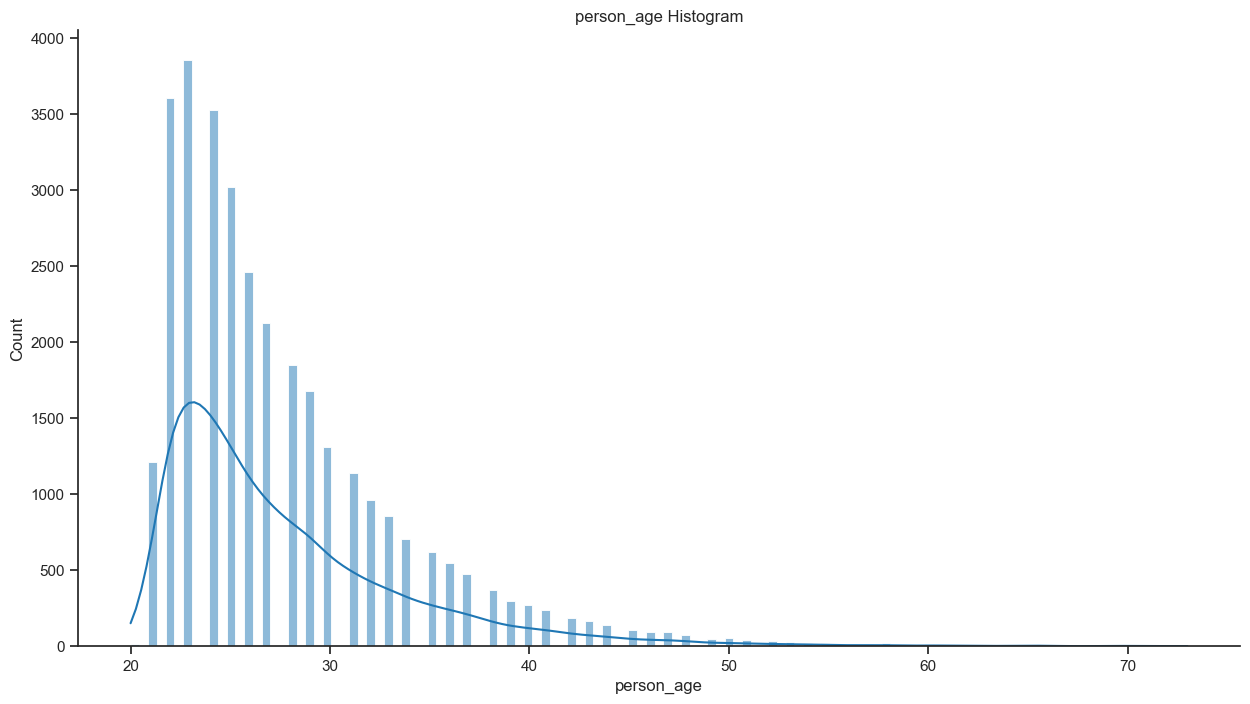

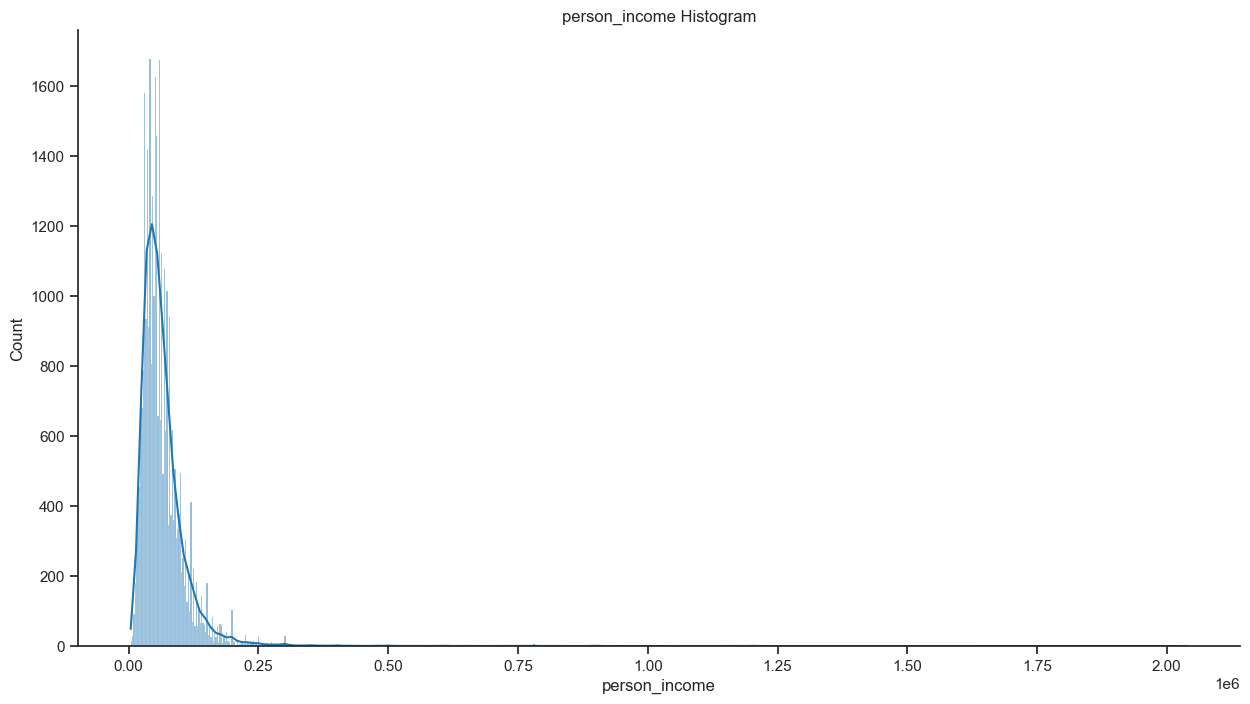

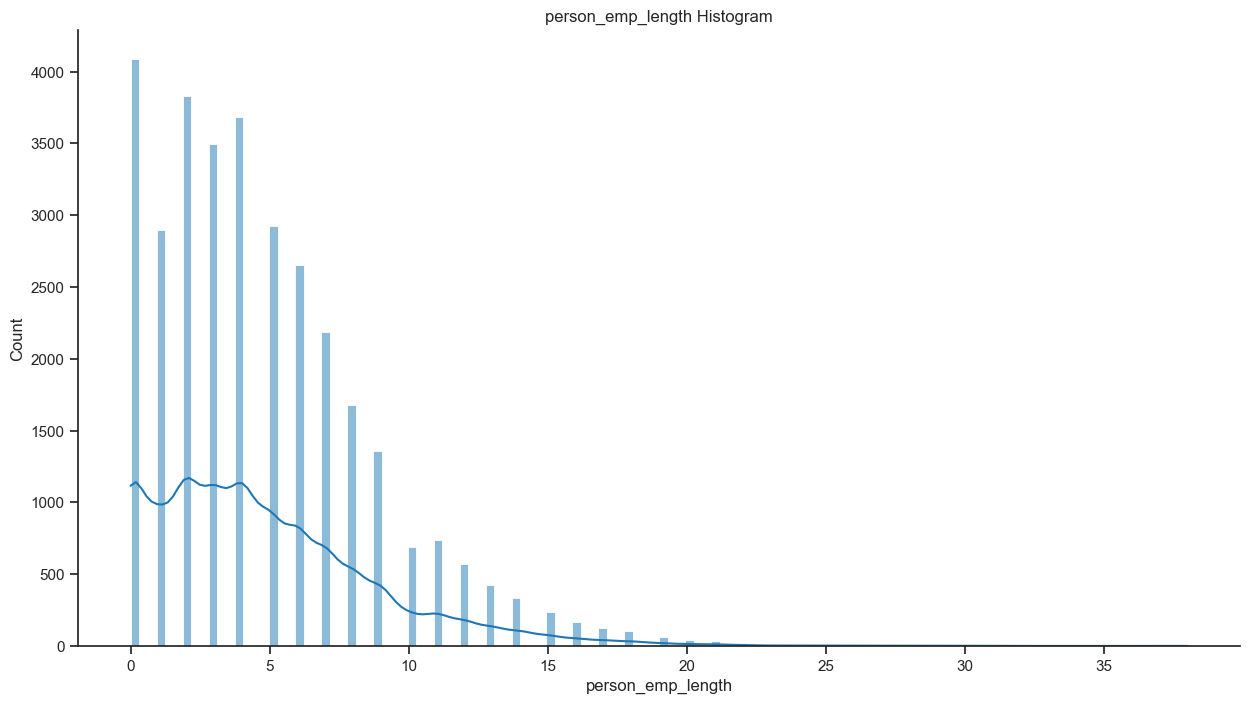

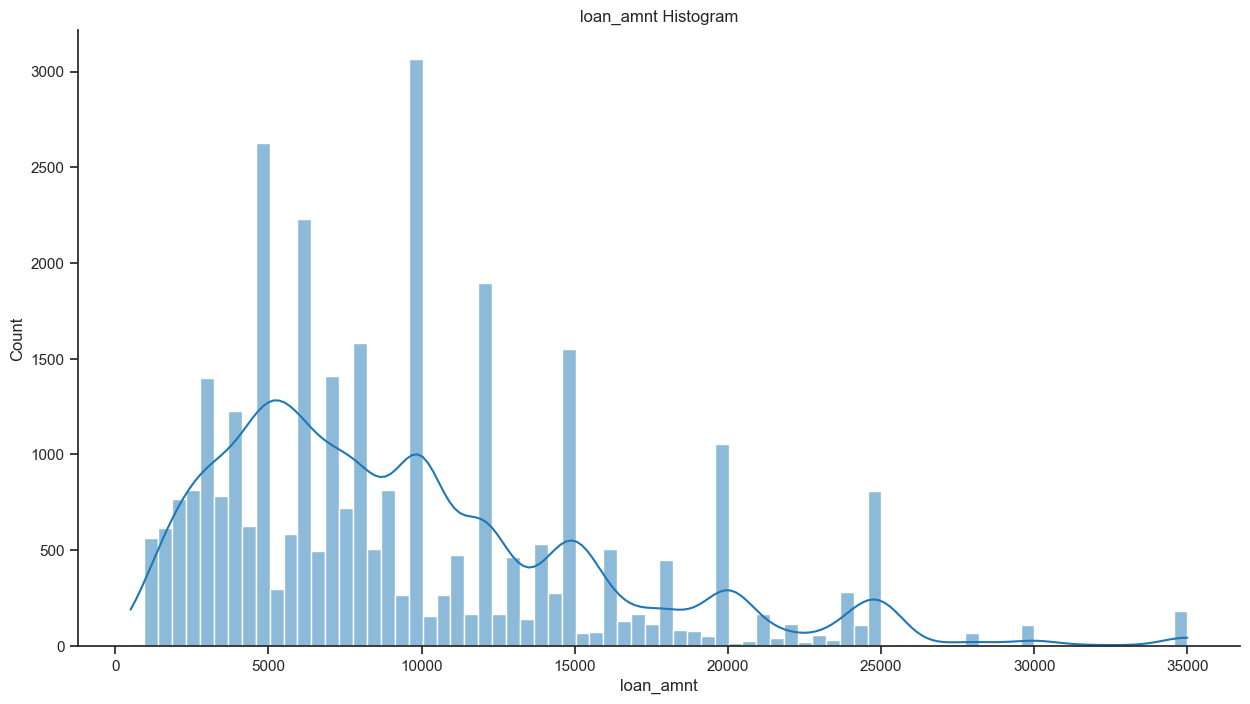

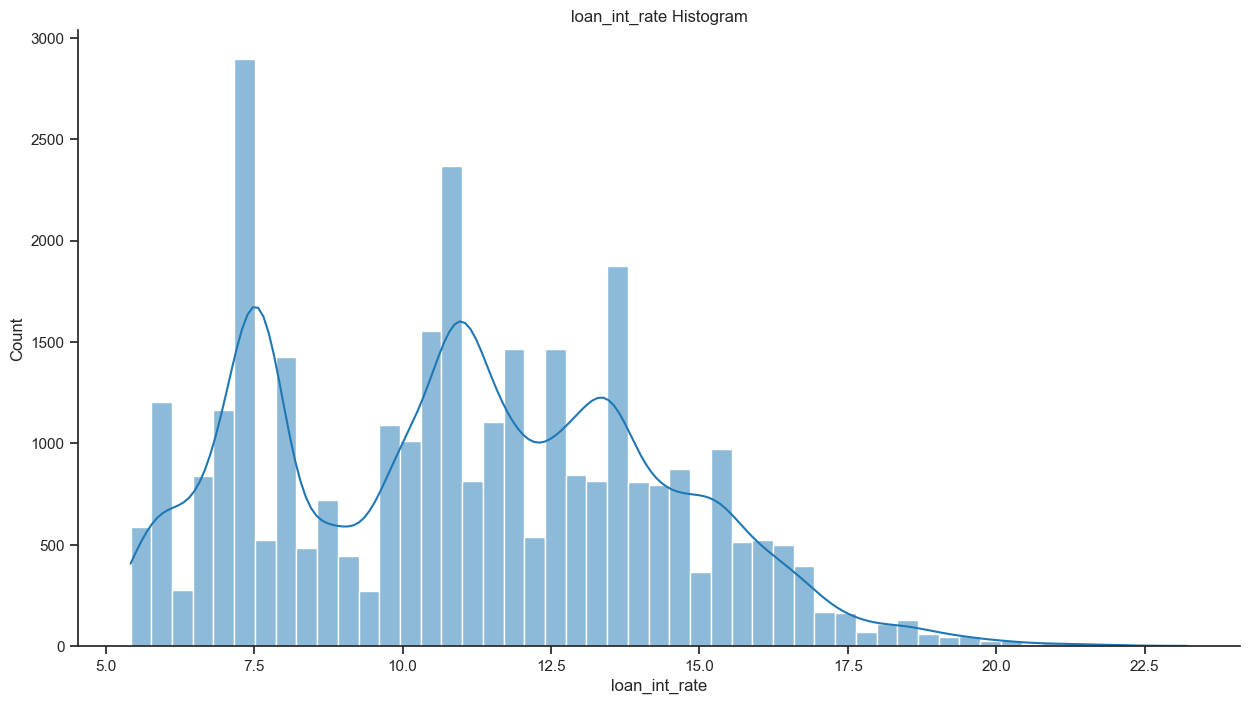

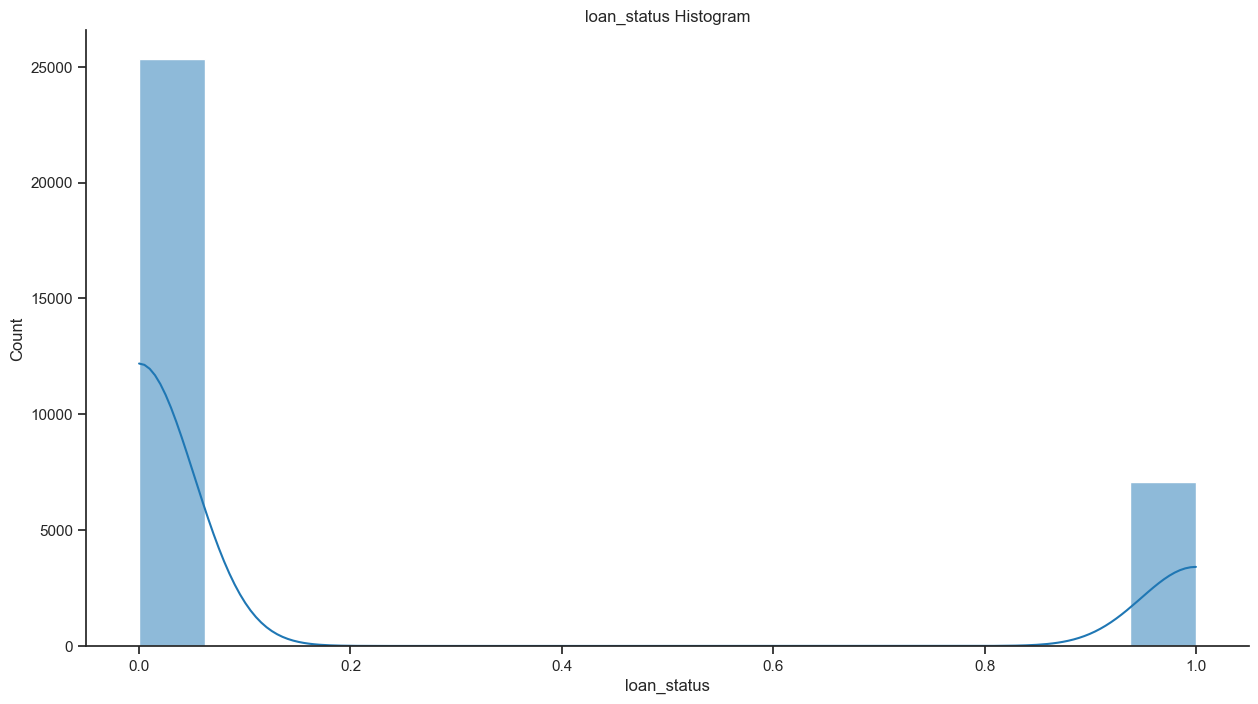

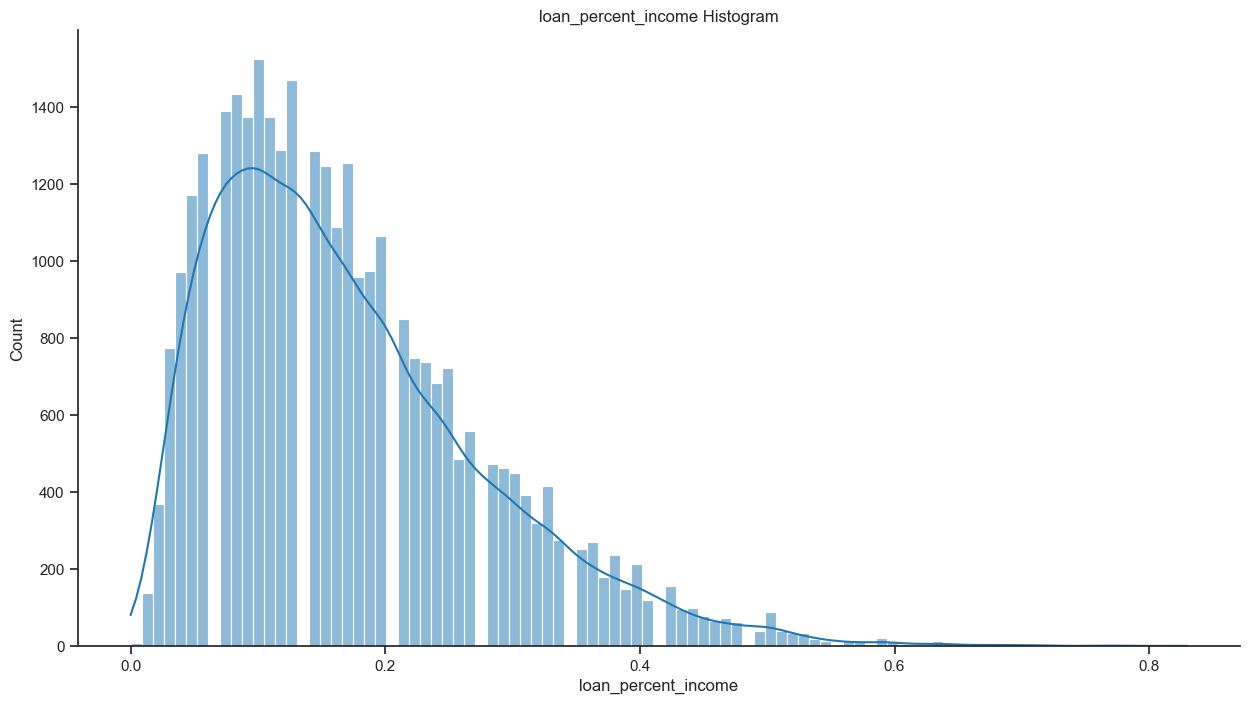

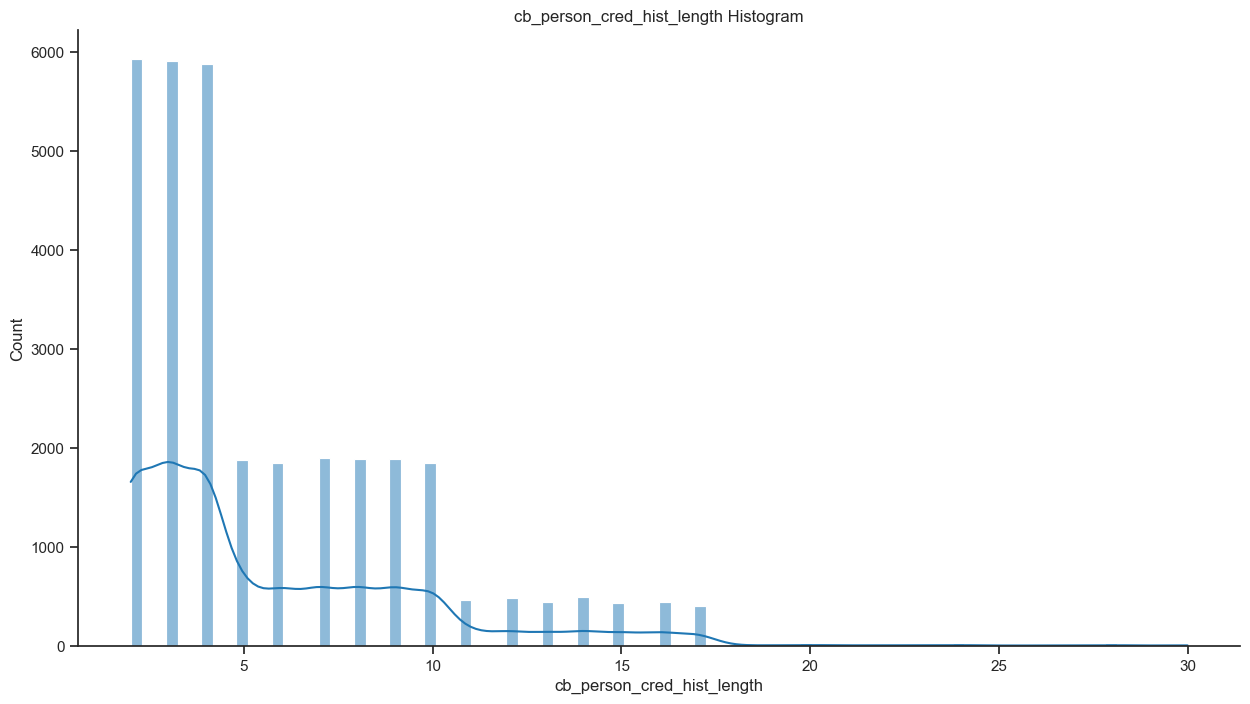

In [101]:
for num_col in cr_df.select_dtypes(include='number').columns:
    ax = sns.histplot(data=cr_df, x=num_col, kde=True)
    ax.set_title(f'{num_col} Histogram')
    plt.show()

There are anomalies in this dataset:
1. Maximum person age = 144 years
2. Maximum person employment length = 123 years

Let's check them out

In [12]:
# check Age >= 70 years old 

cr_df[cr_df['person_age'] >= 70].sort_values(by='person_age', ascending=False)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
32132,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32251,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,N,27
32341,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24
32257,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,0,0.11,N,25
32190,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25
32369,76,75000,RENT,23.0,MEDICAL,A,15000,8.94,0,0.20,N,25


Let's make a upper boundary for the age. It's unlikely to person above 75 years get the credit. We set for 75 years old as a boundary

In [13]:
cr_df = cr_df[cr_df['person_age'] <= 75].reset_index(drop=True)

In [14]:
cr_df.sort_values(by='person_emp_length', ascending=False)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
208,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
32341,53,106000,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,0.19,N,23
32255,58,49000,MORTGAGE,34.0,MEDICAL,D,7500,13.55,1,0.15,Y,24
32095,46,180000,MORTGAGE,31.0,MEDICAL,B,18000,9.91,0,0.10,N,12
...,...,...,...,...,...,...,...,...,...,...,...,...
32116,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32158,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32189,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32280,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


It's impossible to have 123 years of working while we are 21 years old or 22 years old. \
Let's set it as null first.

In [15]:
cr_df.loc[cr_df['person_emp_length'] == 123, 'person_emp_length'] = np.nan

Check if employment length more that person age

In [16]:
cr_df.query('person_age < person_emp_length')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


There is no other values in the dataset that emplyement length more than person age

## Null Values

In [17]:
# check null

cr_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              889
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3093
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Person employment length and loan interest rate have null values. \
Let's check them out!

/var/folders/tc/rbnfvcts4zs91x8c631dqs5w0000gp/T/ipykernel_4088/408384678.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(cr_df.corr(), dtype=bool))
/var/folders/tc/rbnfvcts4zs91x8c631dqs5w0000gp/T/ipykernel_4088/408384678.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cr_df.corr(), vmin=-1, vmax=1, annot=True, square=True, mask=mask)


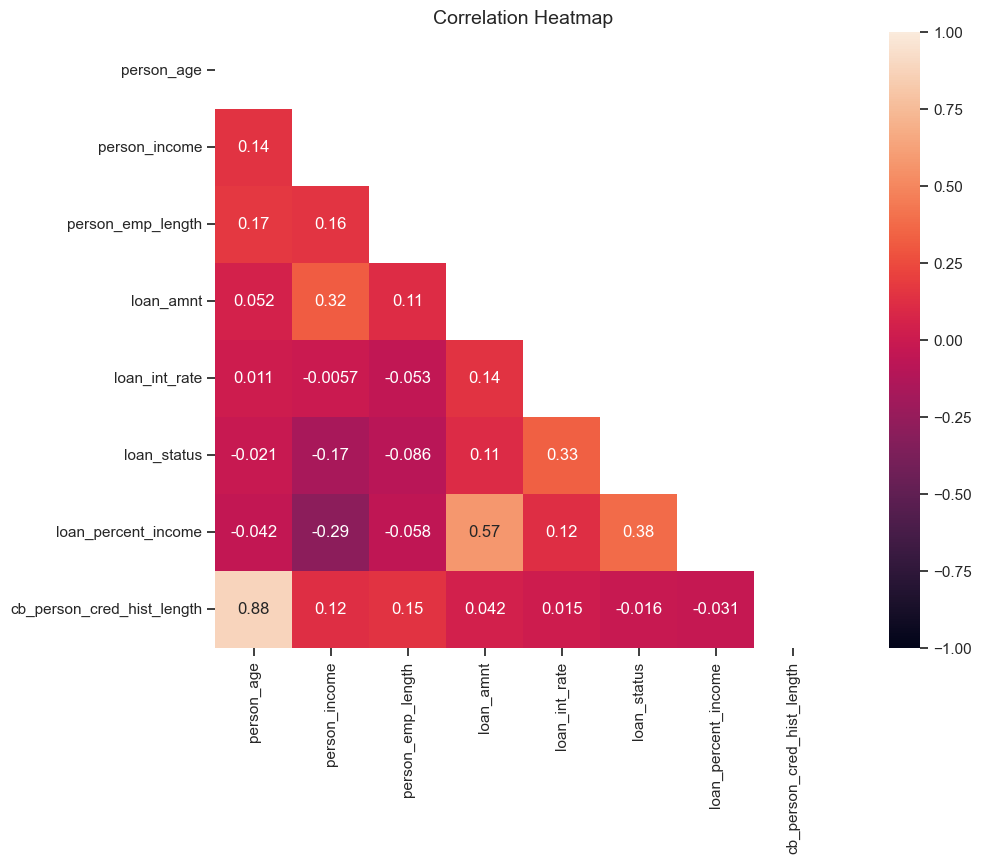

In [112]:
mask = np.triu(np.ones_like(cr_df.corr(), dtype=bool))
sns.heatmap(cr_df.corr(), vmin=-1, vmax=1, annot=True, square=True, mask=mask)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

In [19]:
cr_df[cr_df['person_emp_length'].isnull()].sort_values(by=['person_age', 'person_income'])

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15940,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
15926,21,9600,RENT,NaN,MEDICAL,B,2375,10.00,1,0.25,N,3
1534,21,10000,RENT,NaN,MEDICAL,A,1450,7.51,0,0.14,N,4
874,21,10140,RENT,NaN,HOMEIMPROVEMENT,C,1000,13.43,1,0.10,N,4
2167,21,12000,RENT,NaN,MEDICAL,B,2500,11.99,1,0.21,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
29923,50,45600,MORTGAGE,NaN,PERSONAL,A,5000,7.90,0,0.11,N,16
32158,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32298,53,54000,RENT,NaN,MEDICAL,D,10000,14.59,1,0.19,Y,27
32280,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


It's reasonable to person_employment_length has higher correlation with person age. \
So we will impute it with median according to person age.

In [20]:
age_nan = cr_df[cr_df['person_emp_length'].isnull()]['person_age'].unique()

for age in age_nan:
    median = cr_df.loc[cr_df['person_age'] == age, 'person_emp_length'].median()
    cr_df.loc[cr_df['person_age'] == age, 'person_emp_length'] = cr_df.loc[cr_df['person_age'] == age, 'person_emp_length'].fillna(median)
    

In [21]:
cr_df['person_emp_length']

0        4.0
1        5.0
2        1.0
3        4.0
4        8.0
        ... 
32401    1.0
32402    4.0
32403    3.0
32404    5.0
32405    2.0
Name: person_emp_length, Length: 32406, dtype: float64

In [22]:
cr_df['person_emp_length'].isnull().sum()

0

In [23]:
cr_df[cr_df['person_age'] == 21].sort_values(by=['person_age', 'person_income', 'loan_amnt', 'loan_int_rate'])

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15960,21,4080,RENT,0.0,EDUCATION,B,1400,11.86,1,0.34,N,4
15959,21,4200,RENT,3.0,PERSONAL,E,2750,16.95,1,0.65,N,3
15953,21,6000,OWN,1.0,PERSONAL,D,1600,14.61,1,0.27,Y,3
15950,21,7200,RENT,0.0,VENTURE,C,2500,13.11,1,0.35,N,3
15944,21,8000,RENT,1.0,DEBTCONSOLIDATION,A,2800,7.40,1,0.35,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
16532,21,192000,MORTGAGE,0.0,EDUCATION,A,20000,6.54,0,0.10,N,2
166,21,200000,MORTGAGE,5.0,EDUCATION,C,16000,14.65,0,0.08,N,4
16672,21,200000,MORTGAGE,5.0,EDUCATION,C,16000,14.65,0,0.08,N,2
174,21,200000,MORTGAGE,2.0,DEBTCONSOLIDATION,C,25000,13.99,0,0.13,N,2


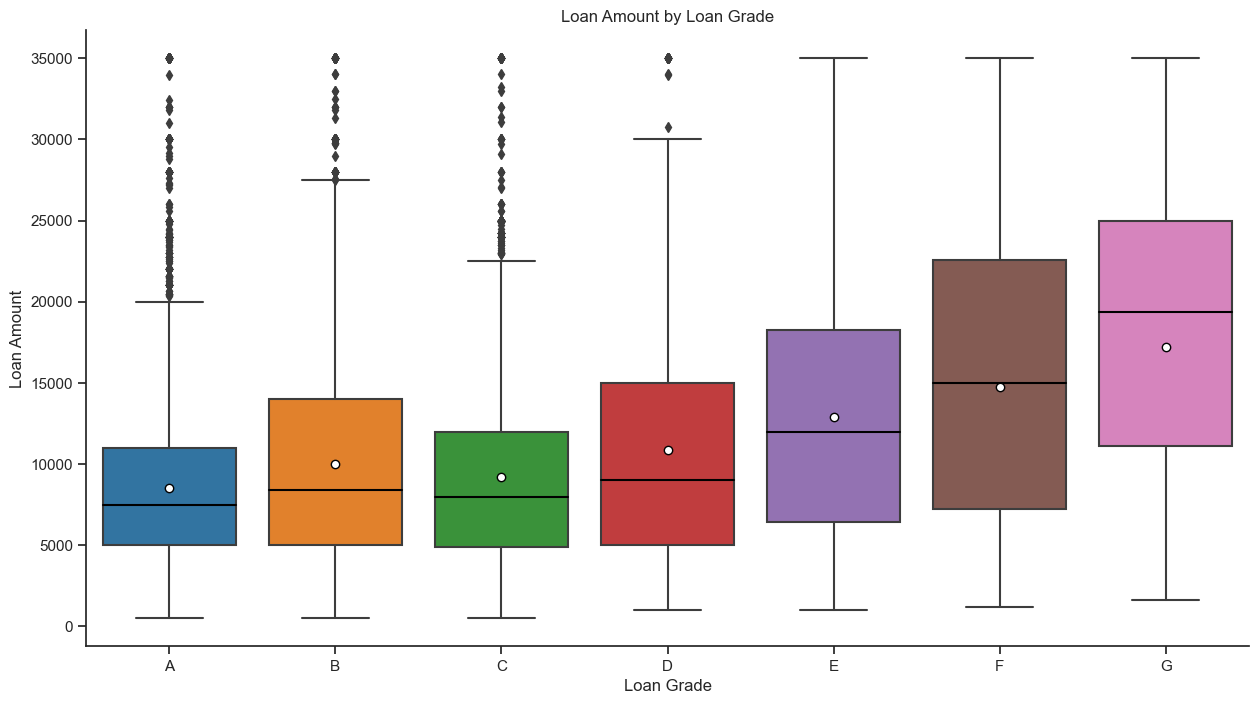

In [105]:
ax = sns.boxplot(data=cr_df.sort_values(by='loan_grade'), x='loan_grade', y='loan_amnt', 
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
            medianprops={'color':'black'})
ax.set_title('Loan Amount by Loan Grade')
ax.set_xlabel('Loan Grade')
ax.set_ylabel('Loan Amount')
plt.show()

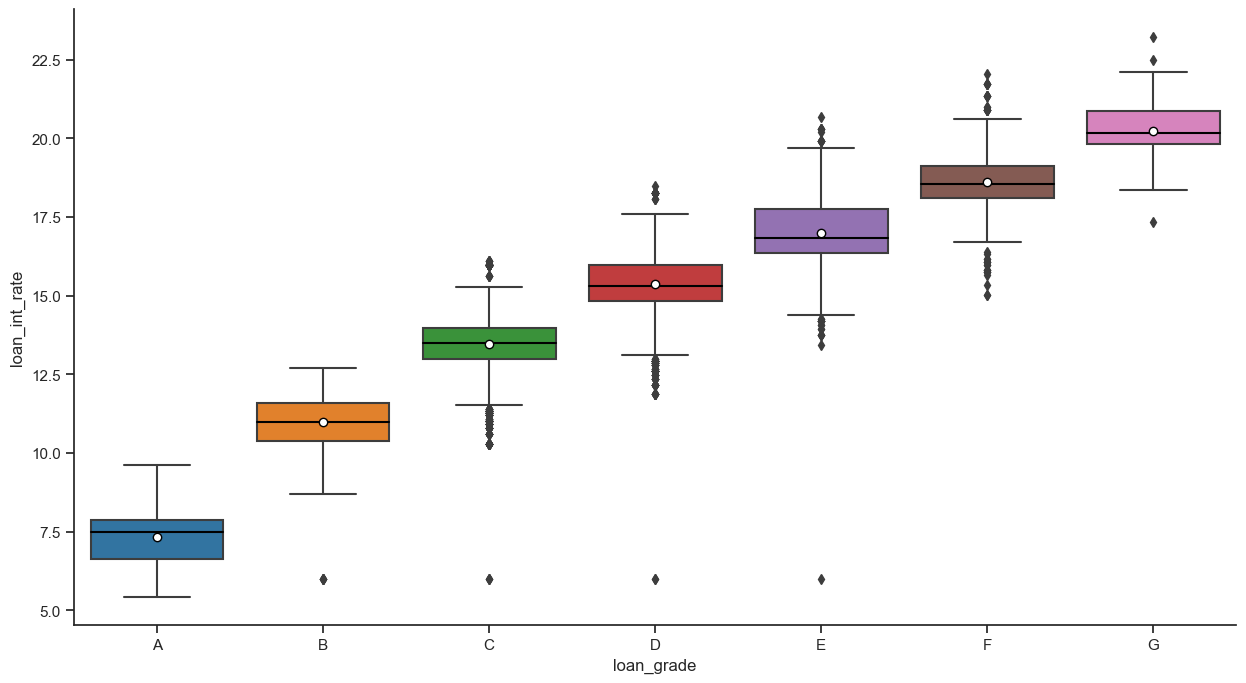

In [111]:
sns.boxplot(data=cr_df.sort_values(by='loan_grade'), x='loan_grade', y='loan_int_rate', 
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
            medianprops={'color':'black'})
ax.set_title('Loan Interest Rate by Loan Grade')
ax.set_xlabel('Loan Grade')
ax.set_ylabel('Loan Interest Rate')
plt.show()

We found loan interest rate increased as loan grade letter greater. \
Therefore, we will impute `loan_int_rate` with median its `loan_grade`.

In [26]:
grade_nan = cr_df[cr_df['loan_int_rate'].isnull()]['loan_grade'].unique()

for grade in grade_nan:
    median = cr_df.loc[cr_df['loan_grade'] == grade, 'loan_int_rate'].median()
    cr_df.loc[cr_df['loan_grade'] == grade, 'loan_int_rate'] = cr_df.loc[cr_df['loan_grade'] == grade, 'loan_int_rate'].fillna(median)
    

In [27]:
cr_df['loan_int_rate'].isnull().sum()

0

In [28]:
cr_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# Exploratory Data Analysis

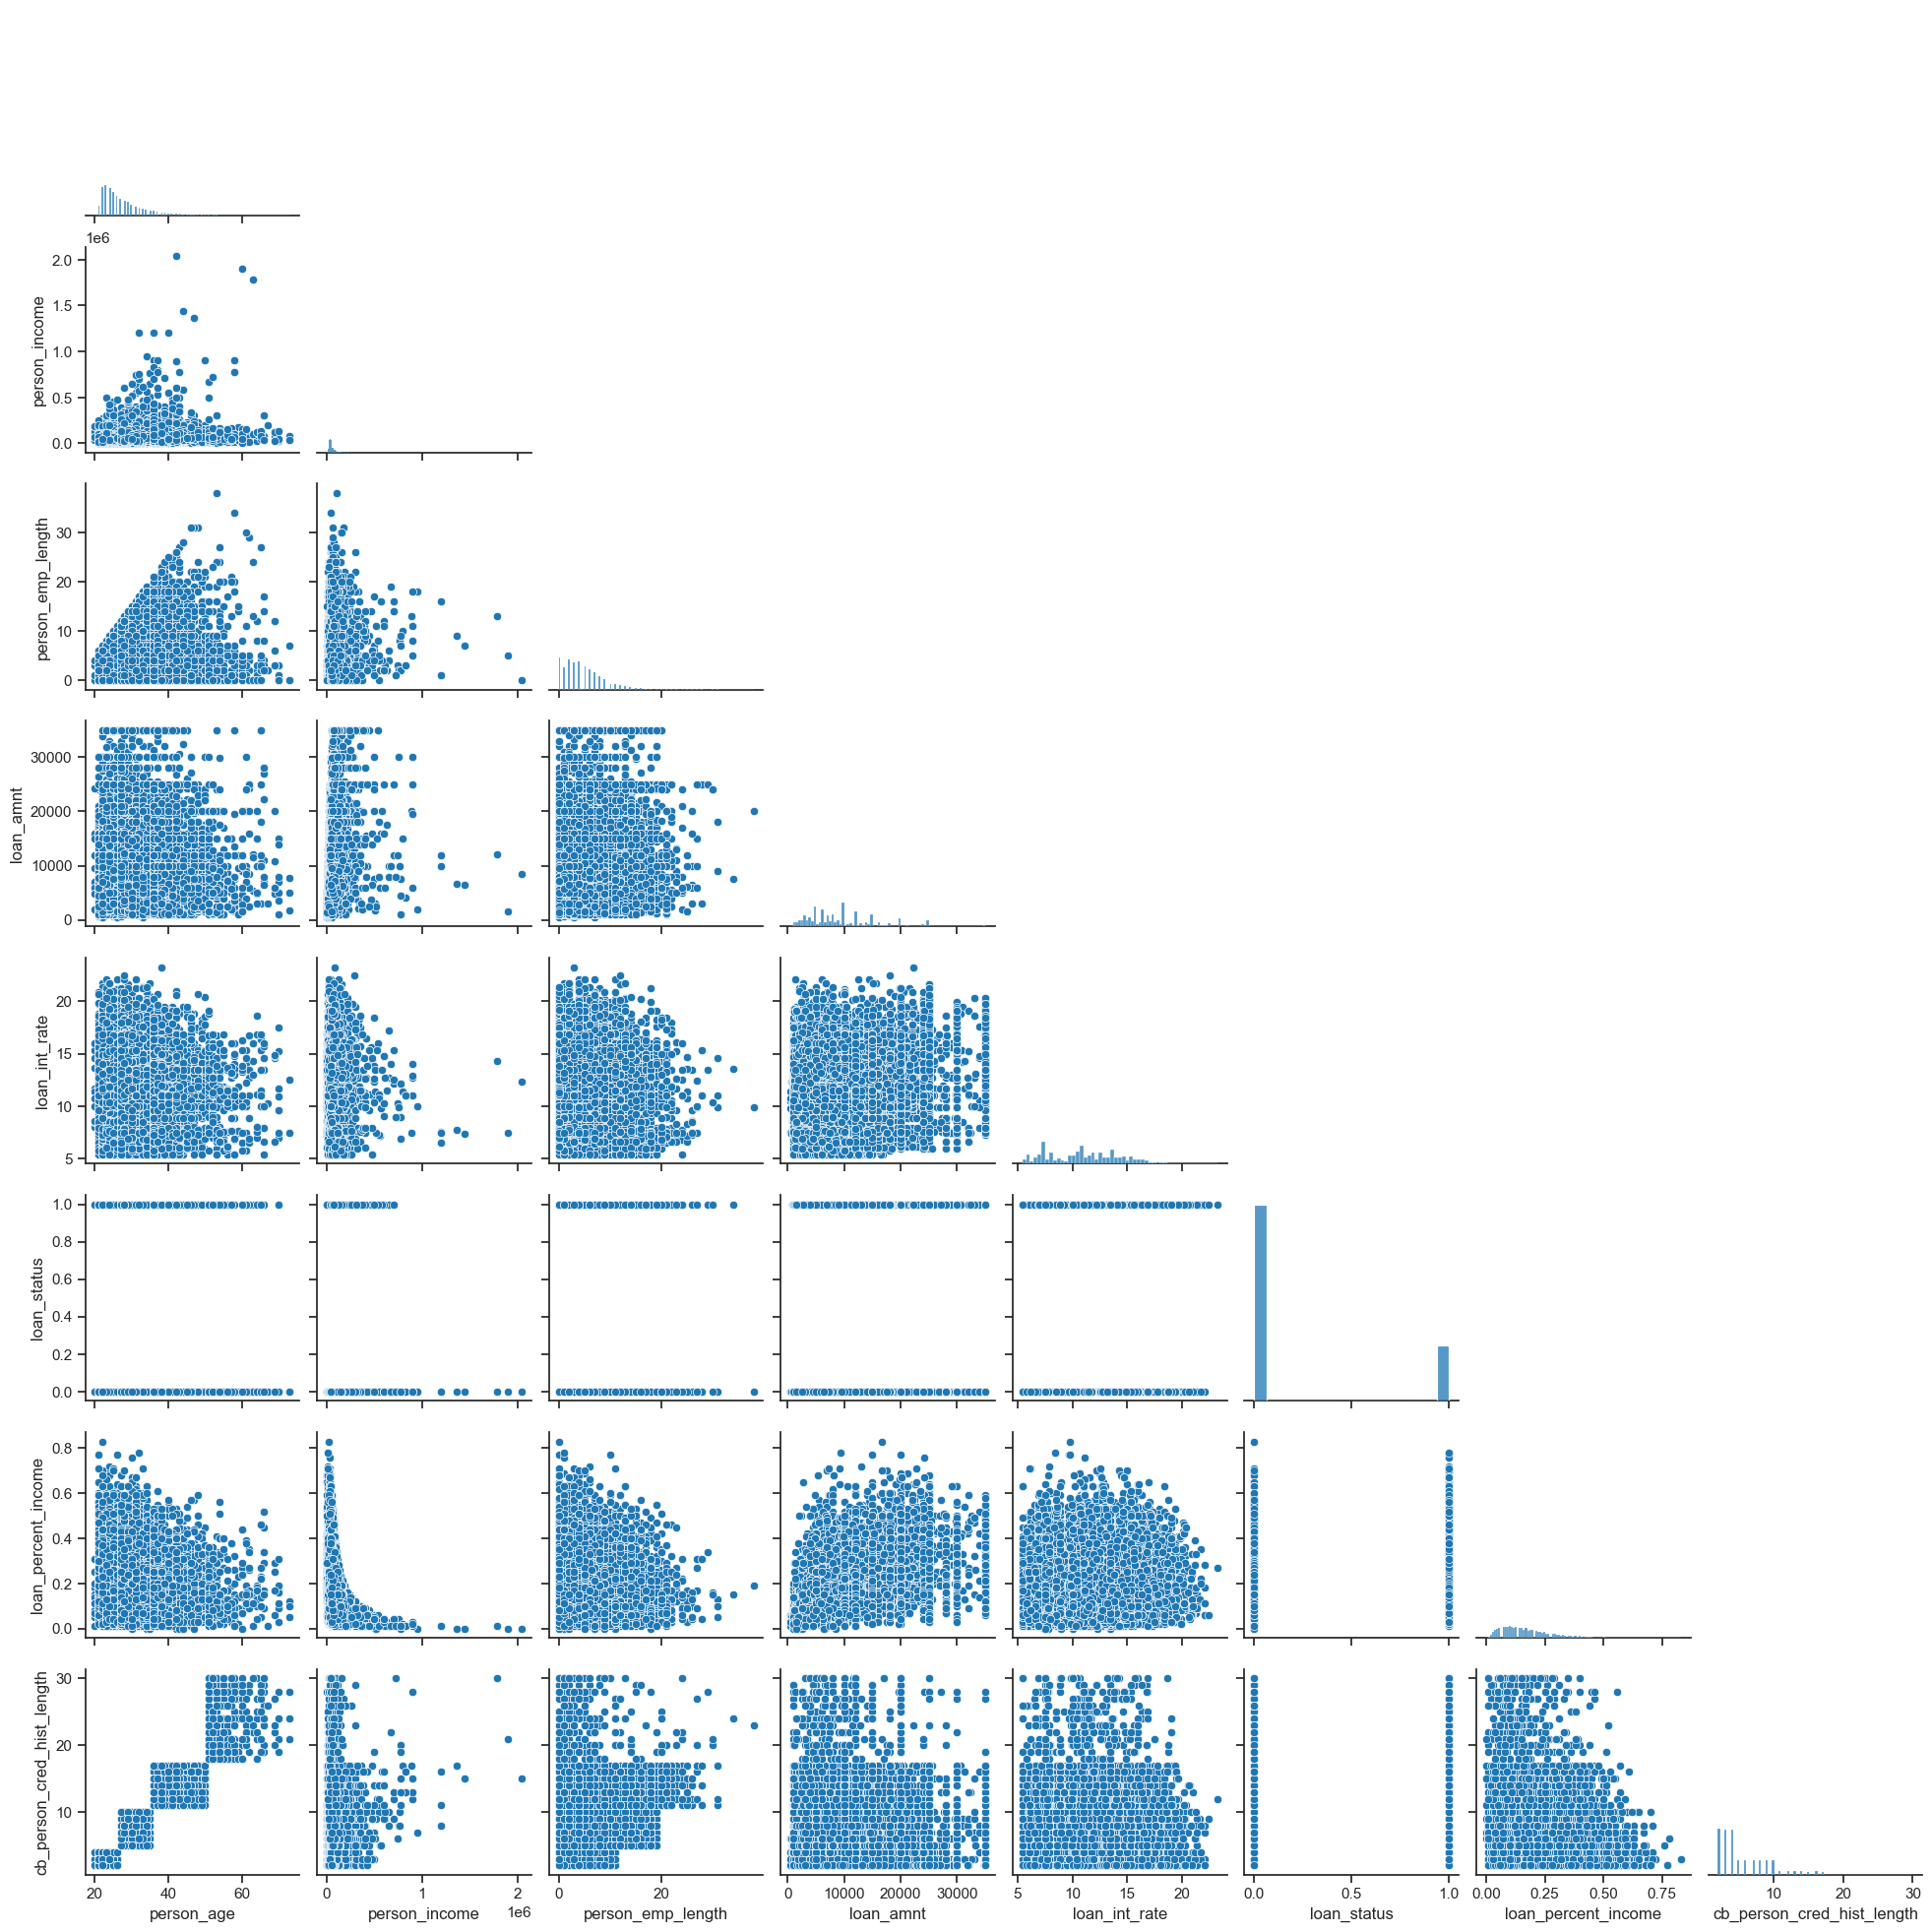

In [29]:
sns.pairplot(cr_df, corner=True)

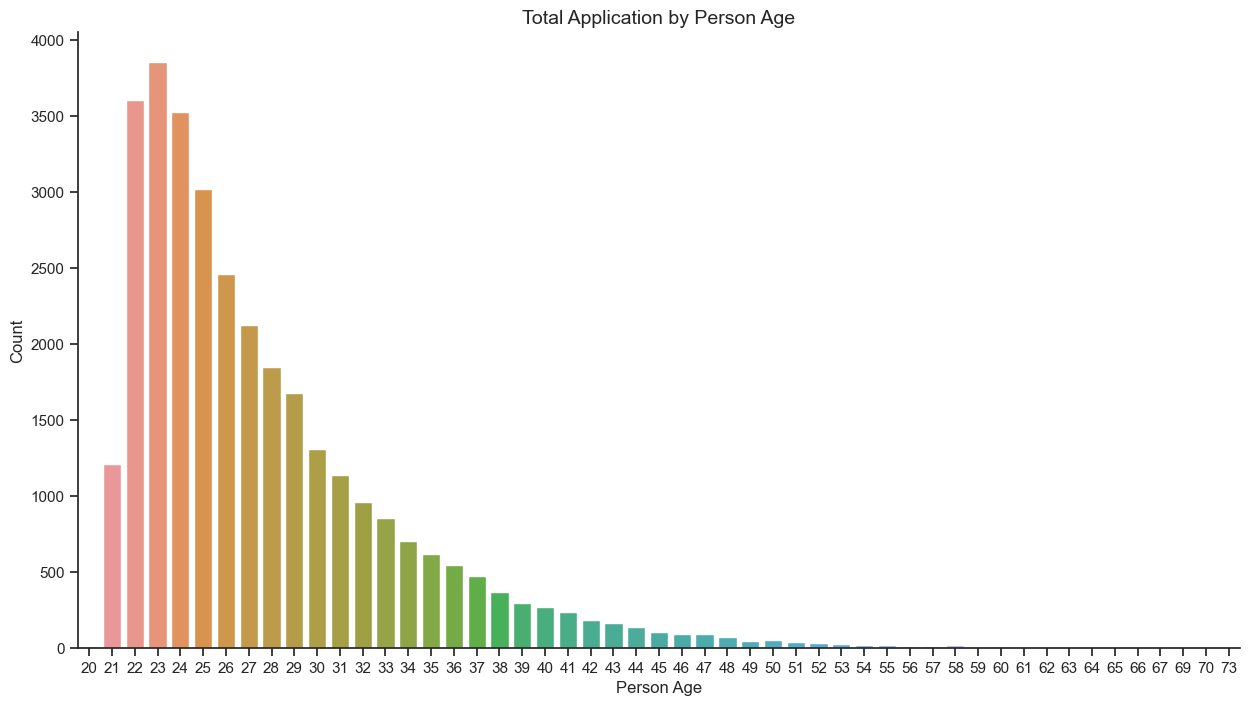

In [31]:
plt.figure(figsize=(15,8))

ax = sns.countplot(data=cr_df, x='person_age')
ax.set_title("Total Application by Person Age", fontsize=14)
ax.set_xlabel('Person Age')
ax.set_ylabel('Count')
# ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

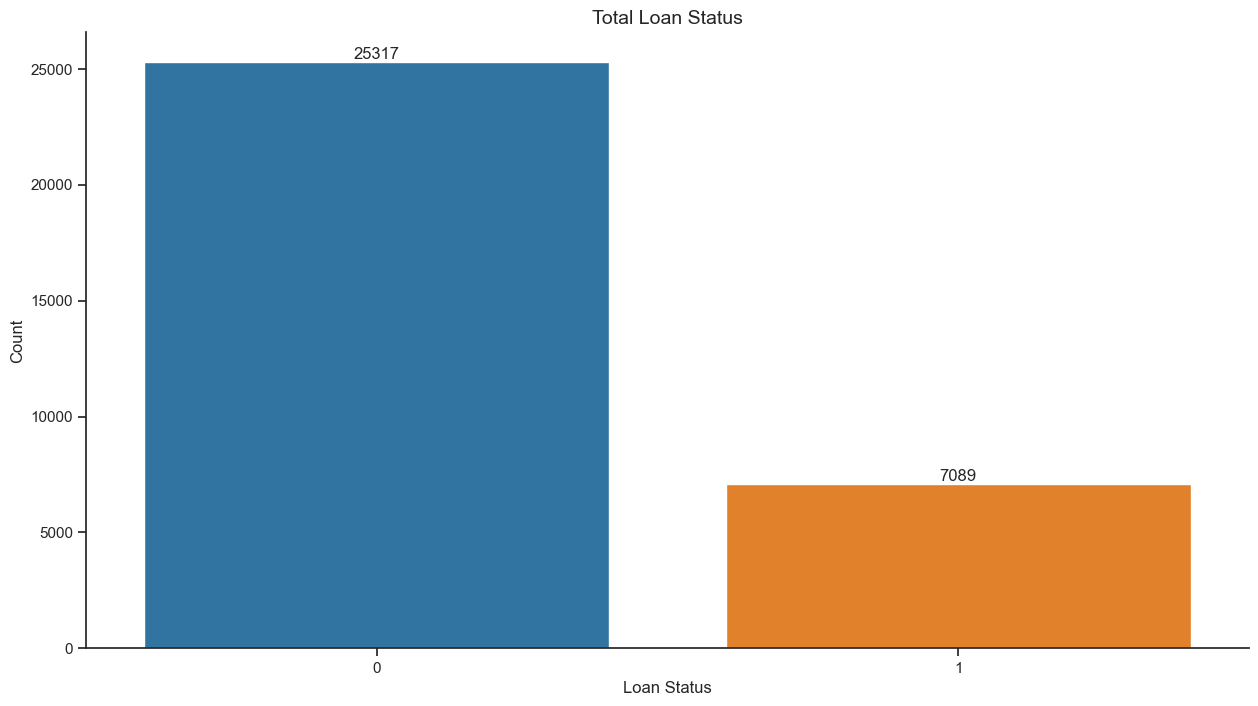

In [83]:
plt.figure(figsize=(15,8))

ax = sns.countplot(data=cr_df, x='loan_status')
ax.set_title("Total Loan Status", fontsize=14)
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

In [86]:
cr_df['loan_status'].value_counts()[0]

25317

In [91]:
print('2', '1' + '3')

2 13


In [96]:
print(f'Percentage Non-Default Status: {(cr_df["loan_status"].value_counts()[0])/(len(cr_df))*100}%')
print(f'Percentage Default Status: {(cr_df["loan_status"].value_counts()[1])/(len(cr_df))*100}%')

Percentage Non-Default Status: 78.1244214034438%
Percentage Default Status: 21.875578596556196%


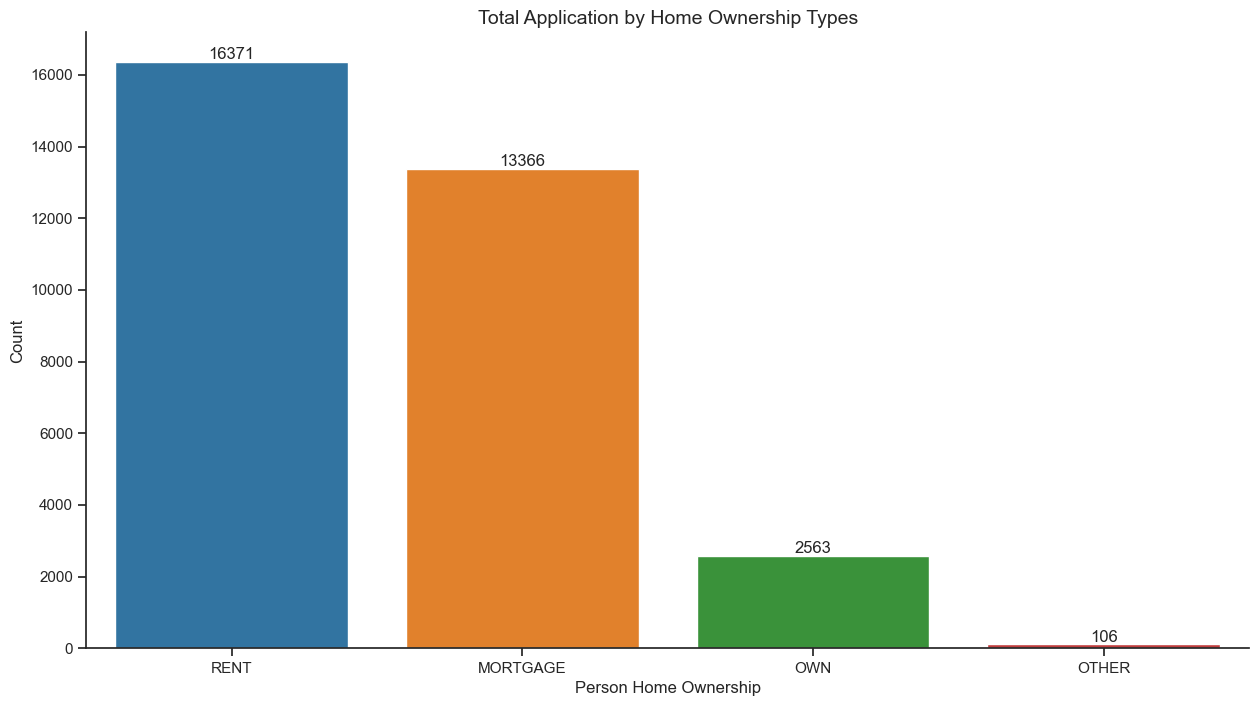

In [32]:
plt.figure(figsize=(15,8))

ax = sns.countplot(data=cr_df, x='person_home_ownership', order=cr_df['person_home_ownership'].value_counts().index)
ax.set_title("Total Application by Home Ownership Types", fontsize=14)
ax.set_xlabel('Person Home Ownership')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

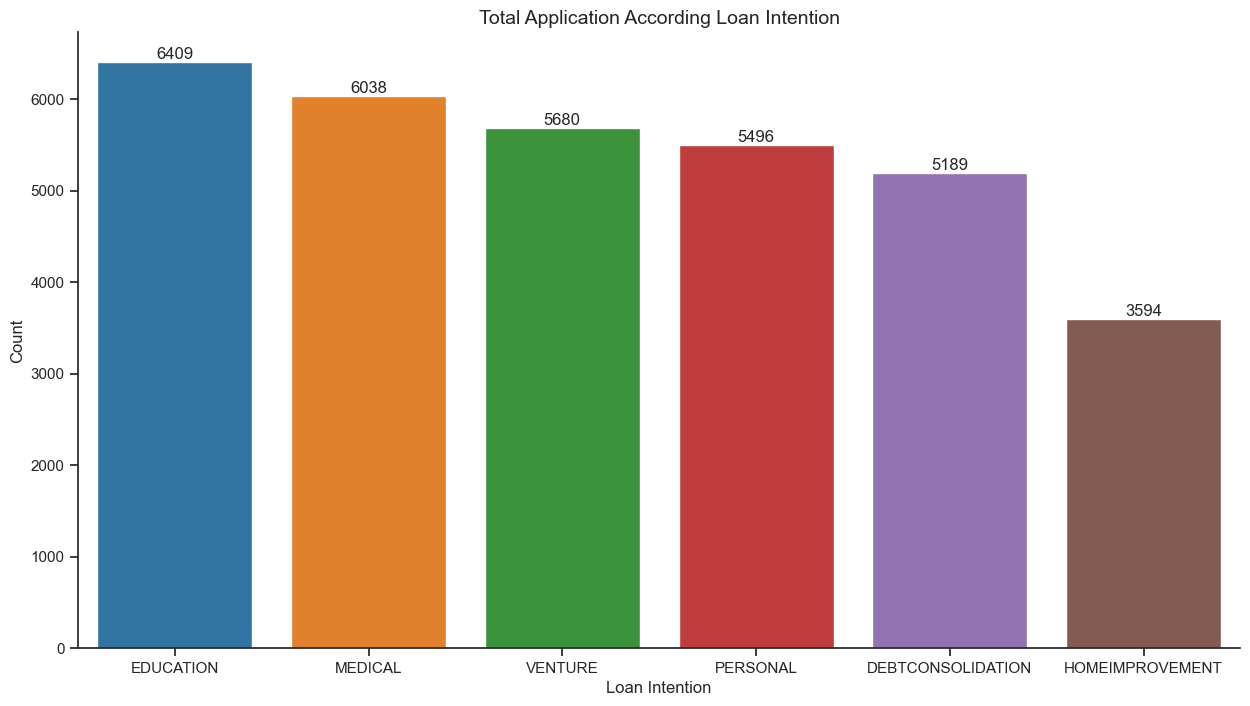

In [33]:
plt.figure(figsize=(15,8))

ax = sns.countplot(data=cr_df, x='loan_intent', order=cr_df['loan_intent'].value_counts().index)
ax.set_title("Total Application According Loan Intention", fontsize=14)
ax.set_xlabel('Loan Intention')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

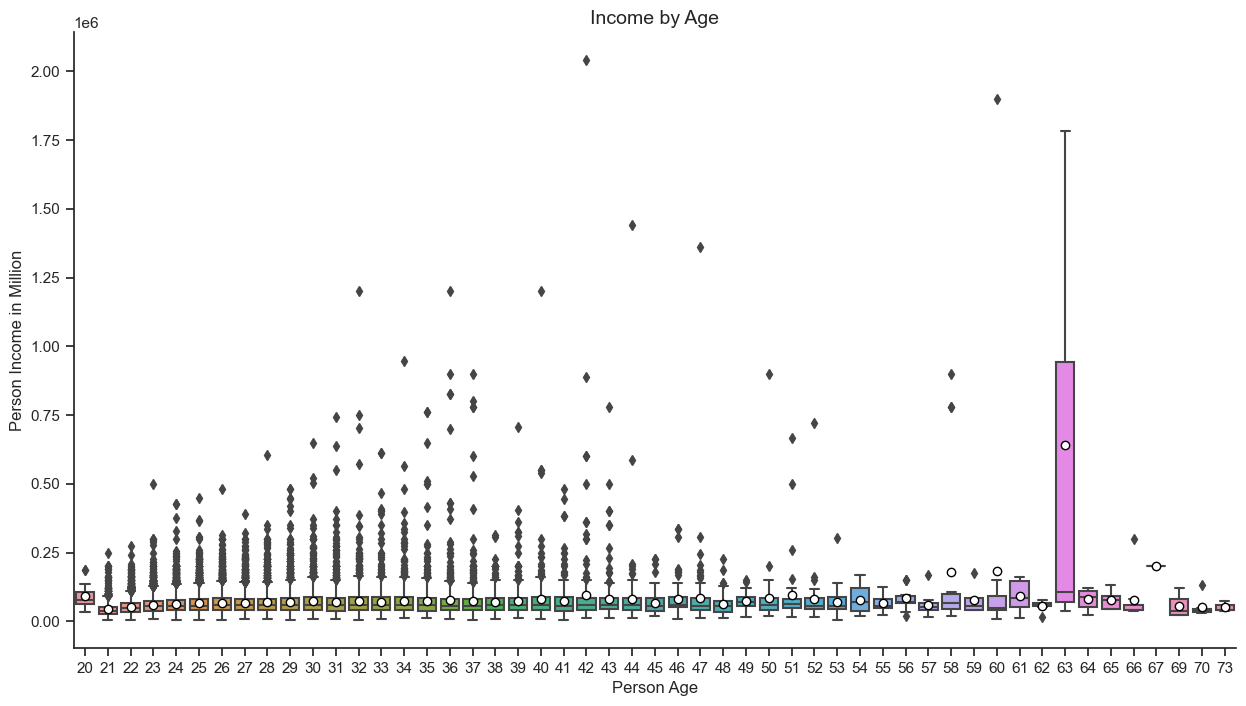

In [39]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=cr_df, x='person_age', y='person_income', showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
ax.set_title("Income by Age", fontsize=14)
ax.set_xlabel('Person Age')
ax.set_ylabel('Person Income in Million')
# ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

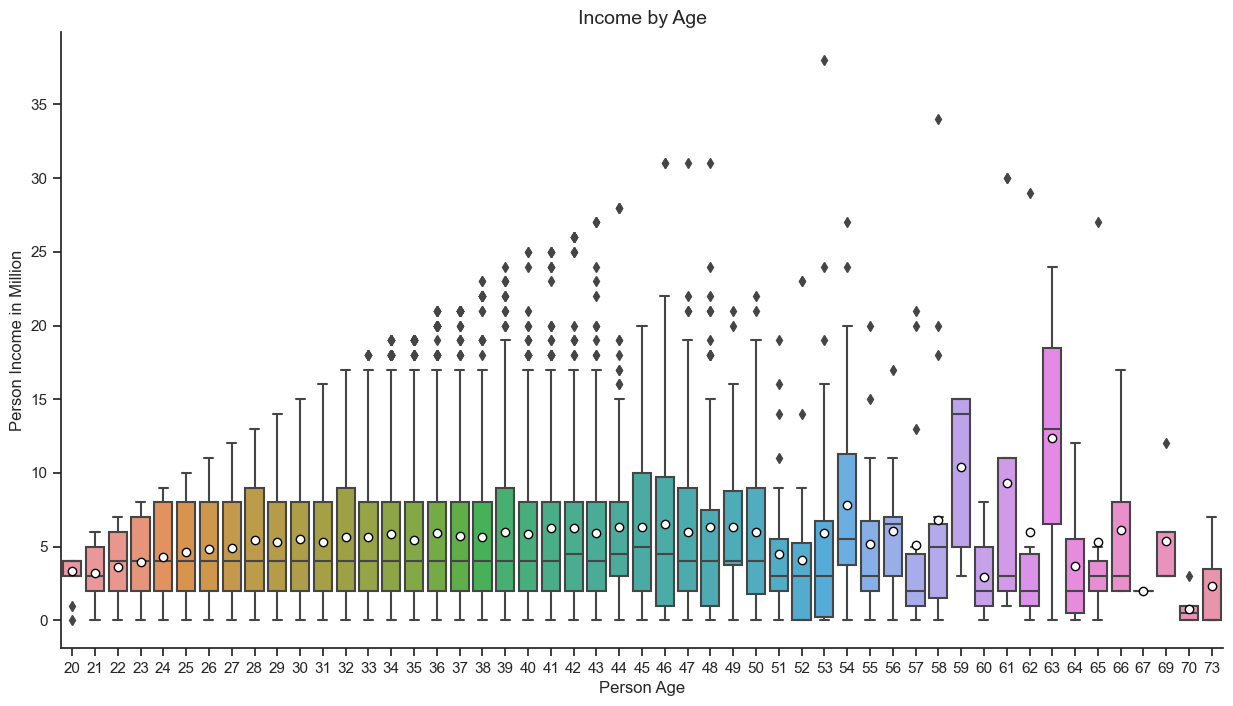

In [40]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=cr_df, x='person_age', y='person_emp_length', showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
ax.set_title("Income by Age", fontsize=14)
ax.set_xlabel('Person Age')
ax.set_ylabel('Person Income in Million')
# ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

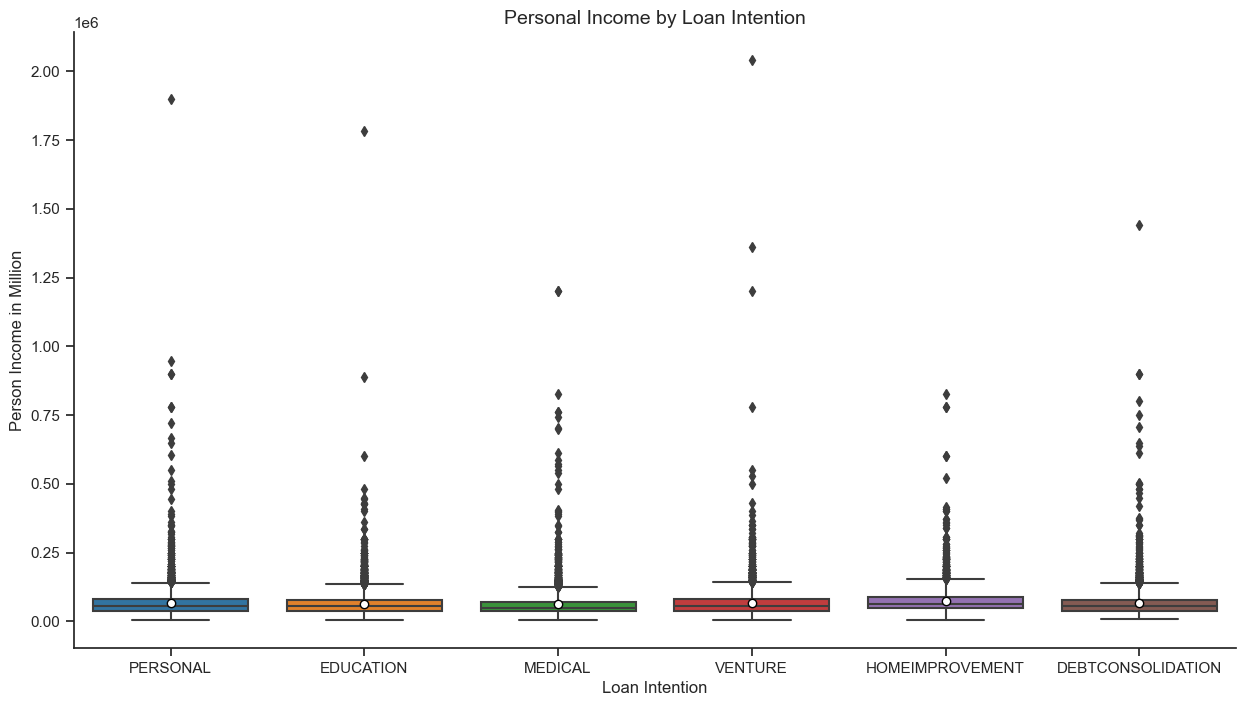

In [44]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=cr_df, x='loan_intent', y='person_income', showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
ax.set_title("Personal Income by Loan Intention", fontsize=14)
ax.set_xlabel('Loan Intention')
ax.set_ylabel('Person Income in Million')
# ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

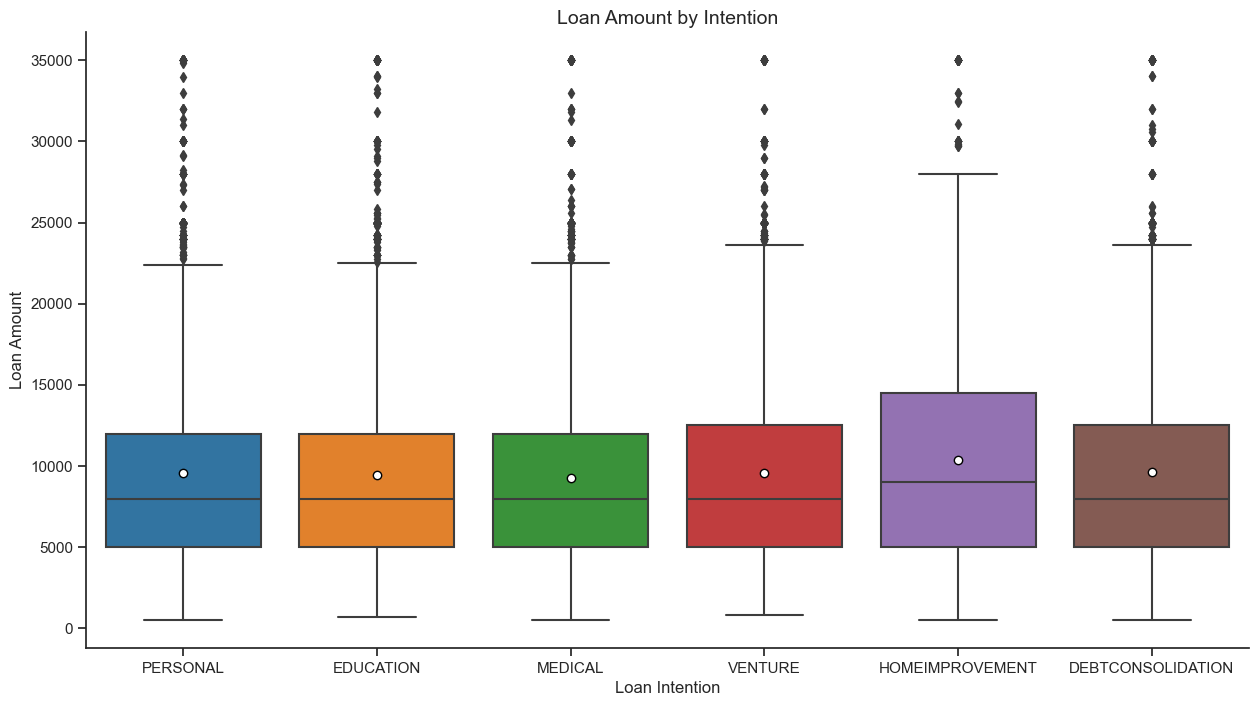

In [46]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=cr_df, x='loan_intent', y='loan_amnt', showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
ax.set_title("Loan Amount by Intention", fontsize=14)
ax.set_xlabel('Loan Intention')
ax.set_ylabel('Loan Amount')
# ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

<Figure size 2000x1500 with 0 Axes>

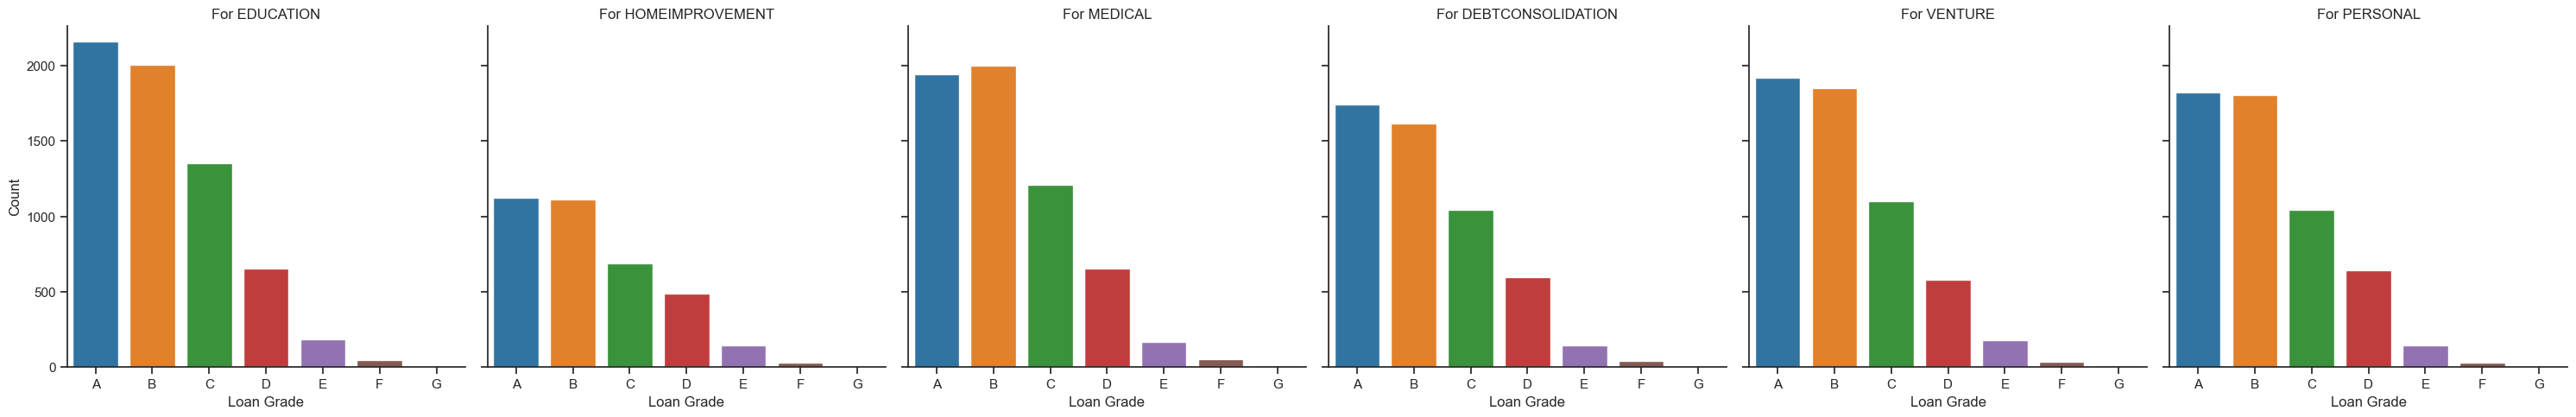

In [120]:
plt.figure(figsize=(20,15))

ax = sns.catplot(
    data=cr_df.sort_values(by='loan_grade'), x="loan_grade", col="loan_intent",
    kind="count")
ax.set_titles('For {col_name}', fontsize=14)
ax.set_axis_labels('Loan Grade', 'Count')

plt.show()

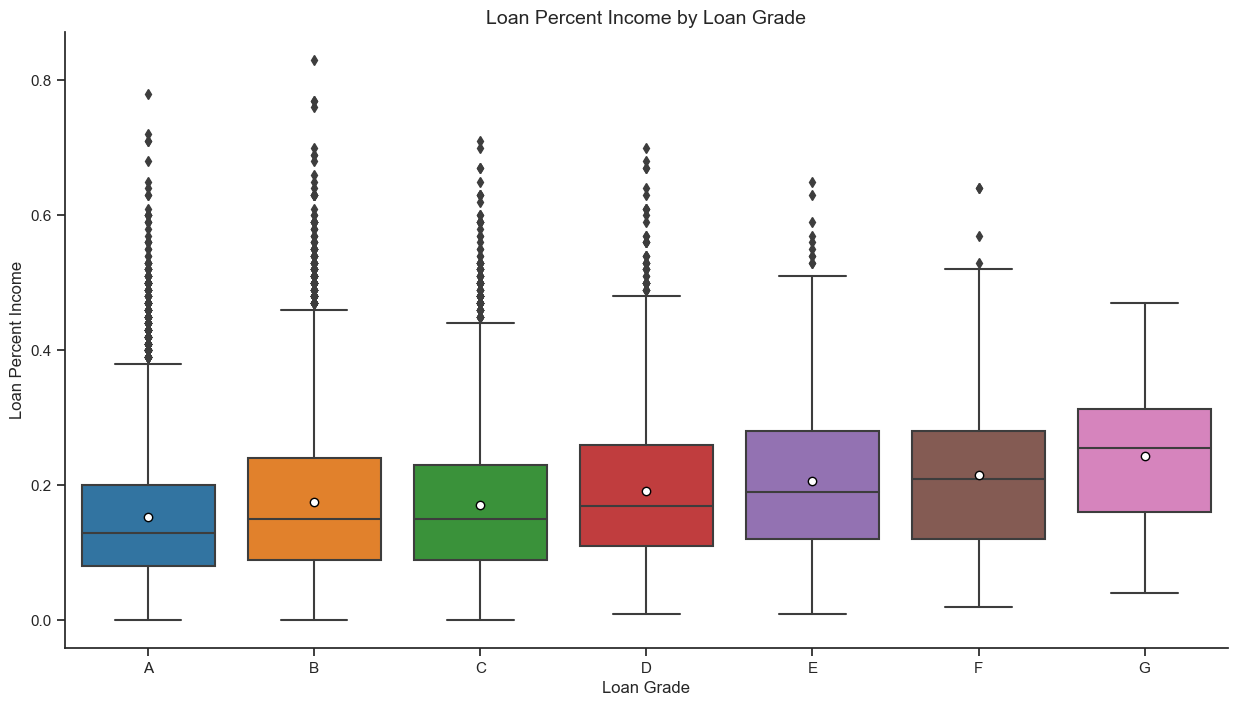

In [67]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=cr_df.sort_values(by='loan_grade'), x='loan_grade', y='loan_percent_income', showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
ax.set_title("Loan Percent Income by Loan Grade", fontsize=14)
ax.set_xlabel('Loan Grade')
ax.set_ylabel('Loan Percent Income')
# ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

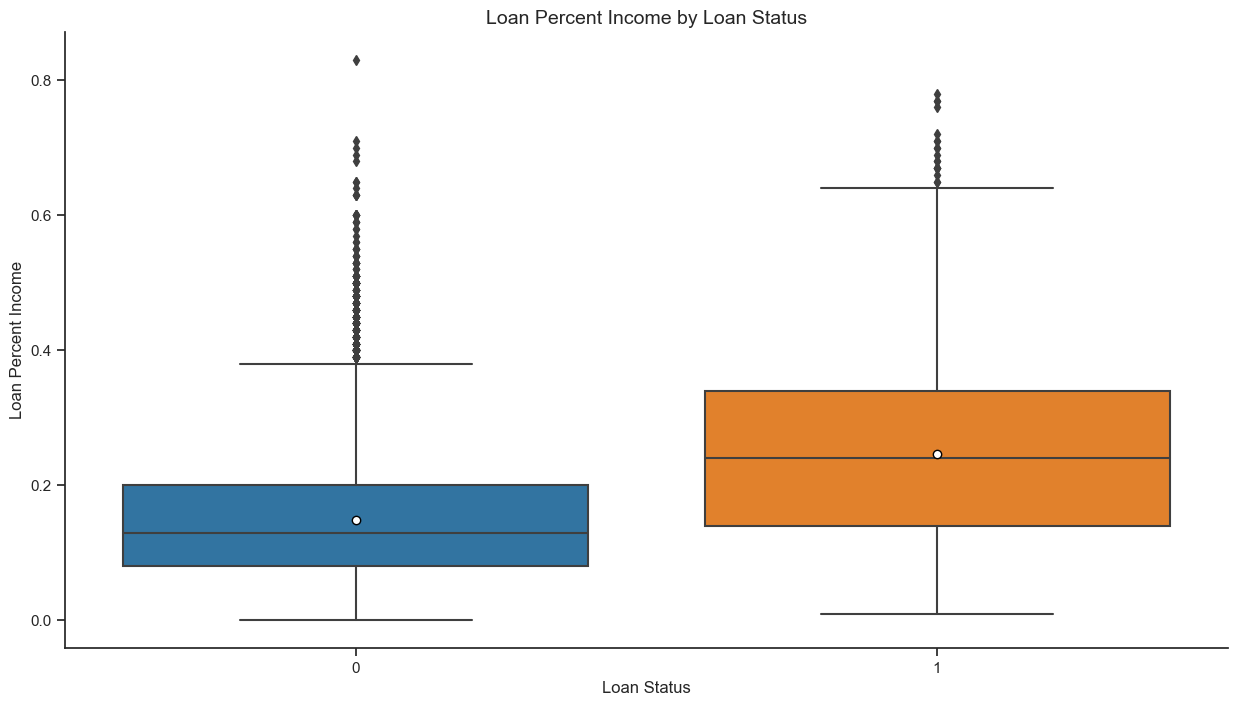

In [71]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=cr_df, x='loan_status', y='loan_percent_income', showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
ax.set_title("Loan Percent Income by Loan Status", fontsize=14)
ax.set_xlabel('Loan Status')
ax.set_ylabel('Loan Percent Income')
# ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

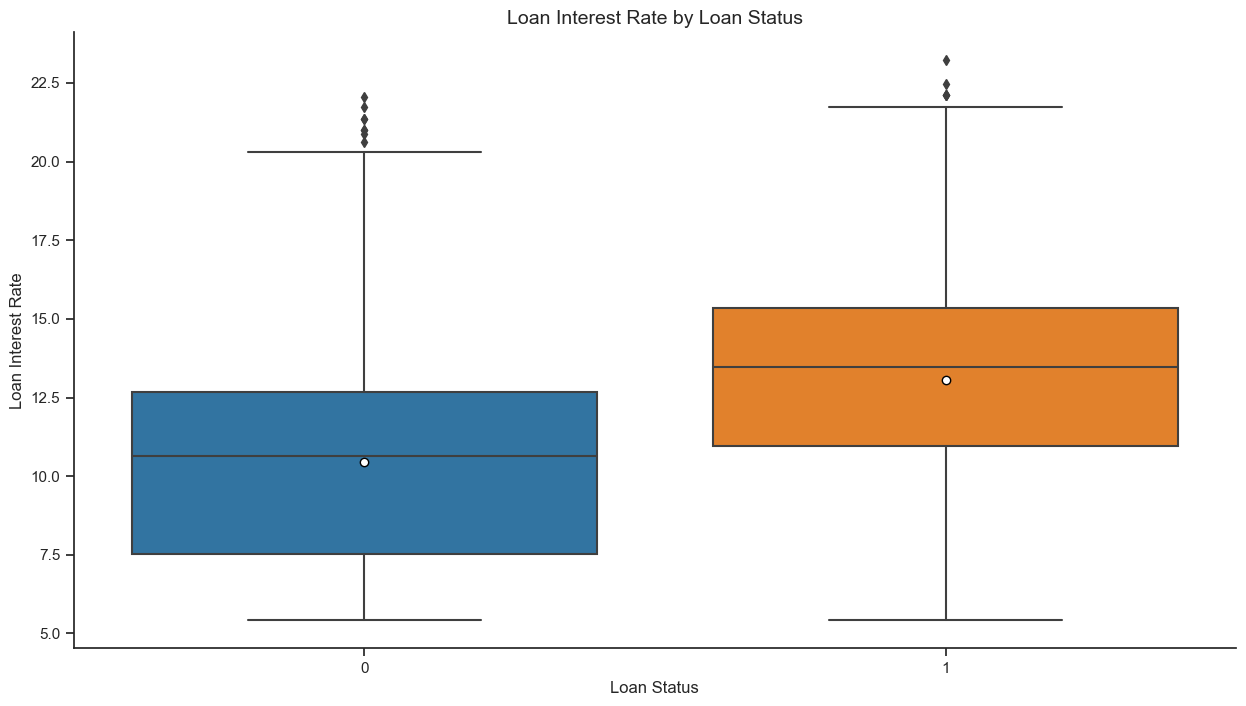

In [73]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(data=cr_df, x='loan_status', y='loan_int_rate', showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
ax.set_title("Loan Interest Rate by Loan Status", fontsize=14)
ax.set_xlabel('Loan Status')
ax.set_ylabel('Loan Interest Rate')
# ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

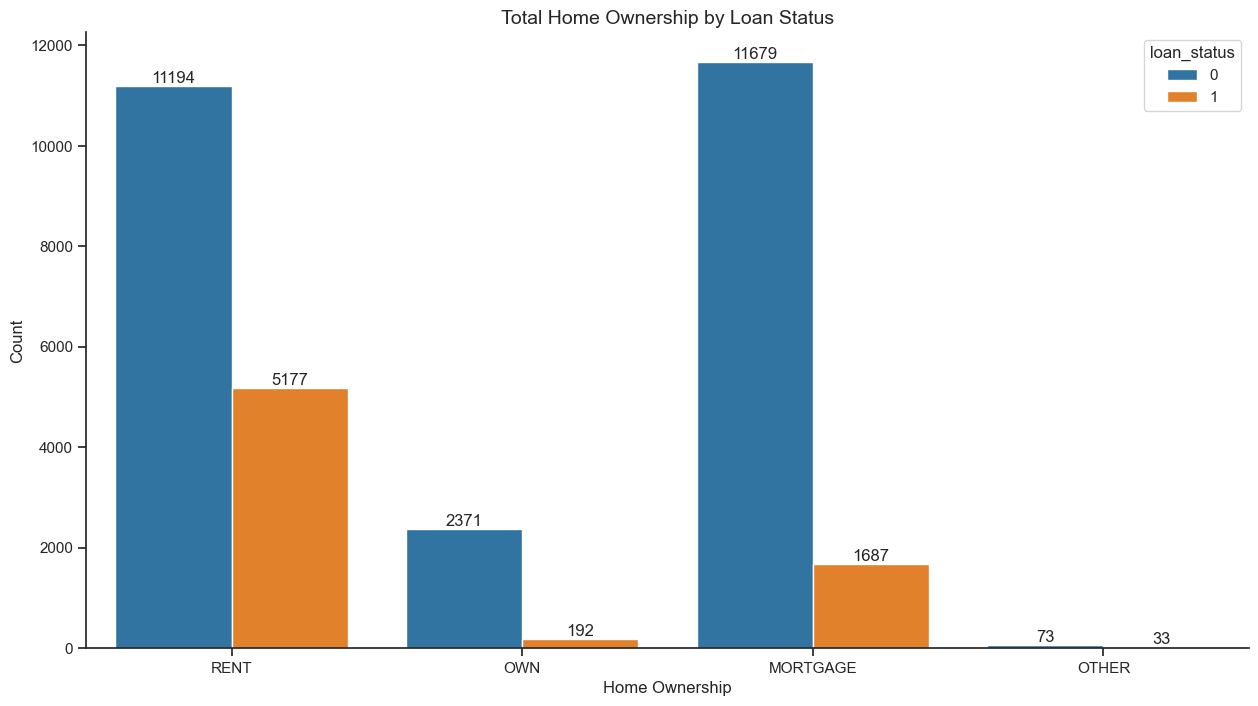

In [77]:
plt.figure(figsize=(15,8))

ax = sns.countplot(data=cr_df, x='person_home_ownership', hue='loan_status')
ax.set_title("Total Home Ownership by Loan Status", fontsize=14)
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

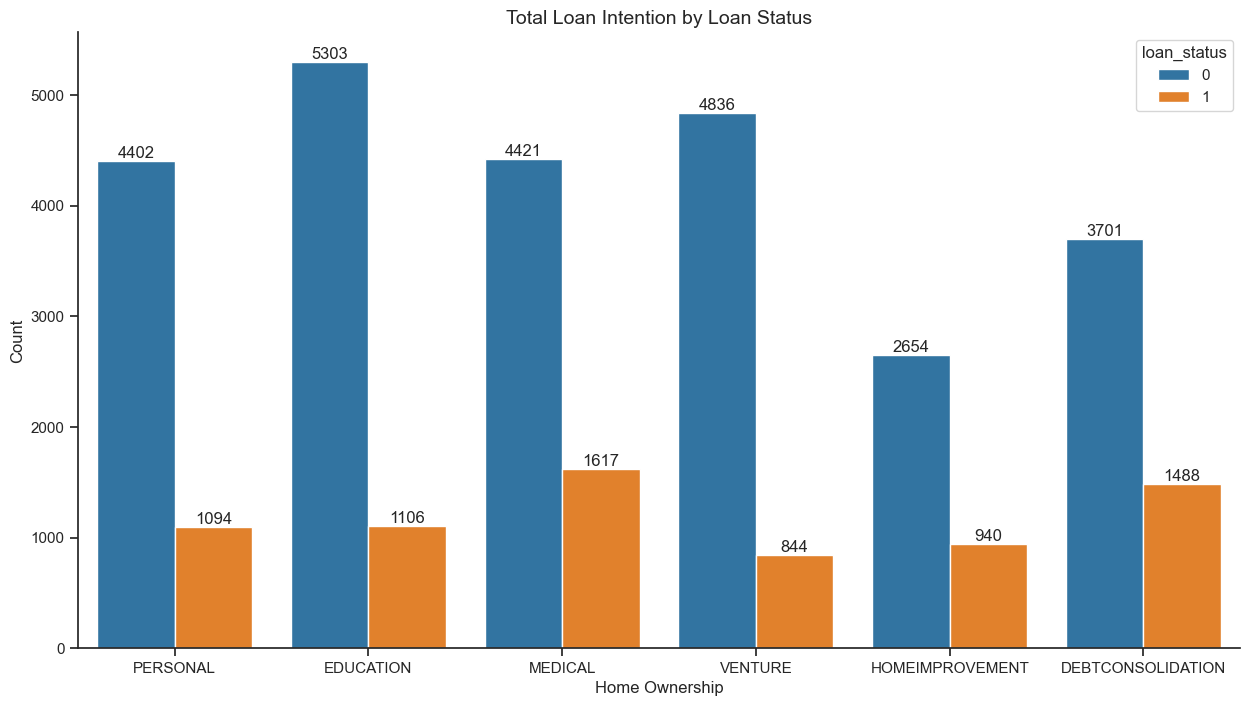

In [79]:
plt.figure(figsize=(15,8))

ax = sns.countplot(data=cr_df, x='loan_intent', hue='loan_status')
ax.set_title("Total Loan Intention by Loan Status", fontsize=14)
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

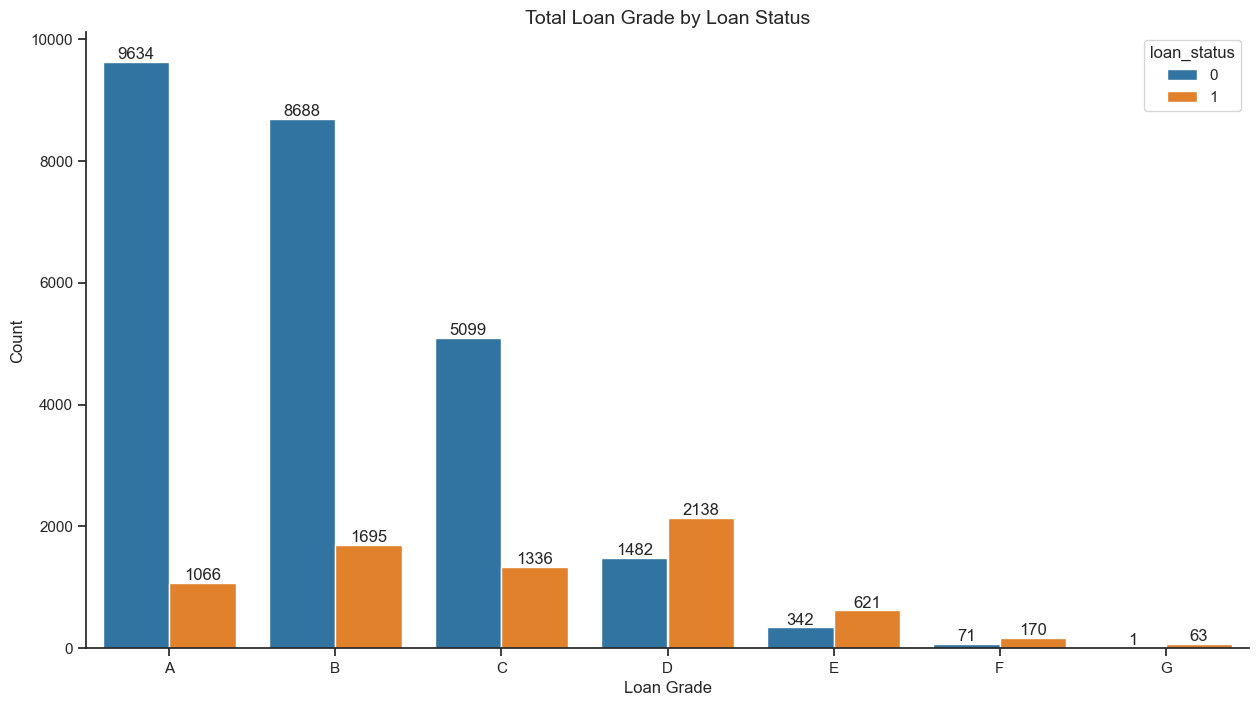

In [78]:
plt.figure(figsize=(15,8))

ax = sns.countplot(data=cr_df.sort_values(by='loan_grade'), x='loan_grade', hue='loan_status')
ax.set_title("Total Loan Grade by Loan Status", fontsize=14)
ax.set_xlabel('Loan Grade')
ax.set_ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

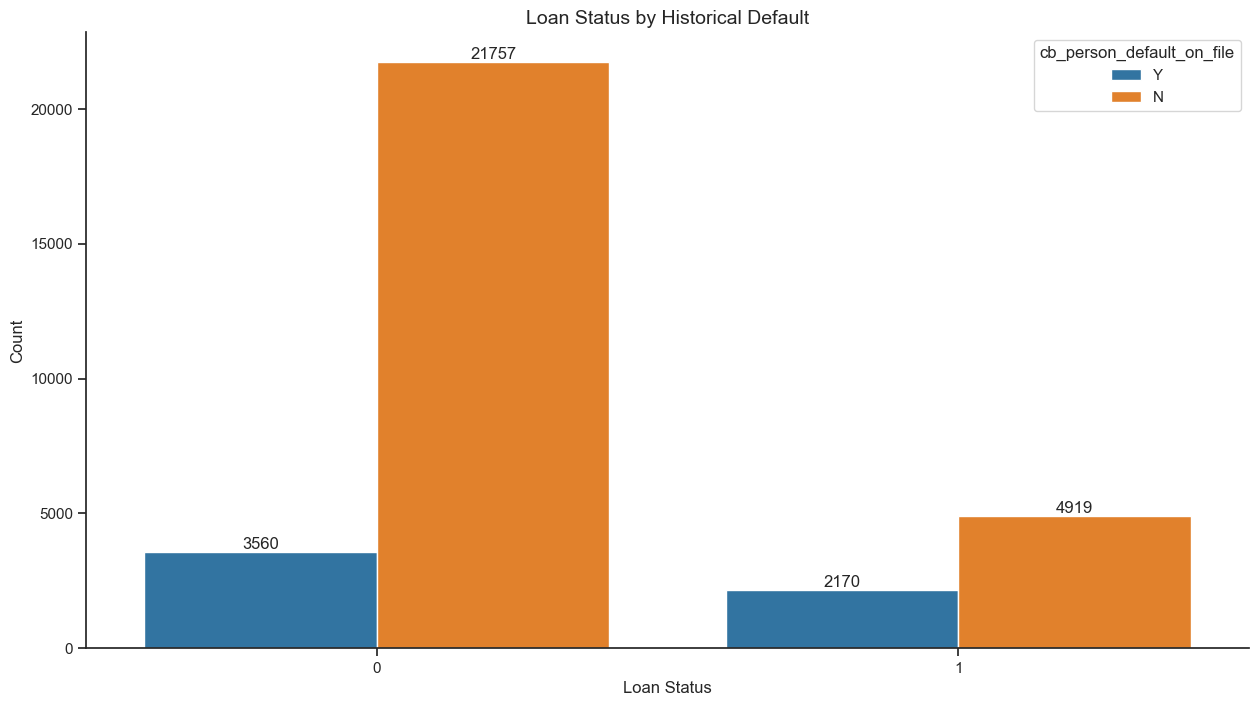

In [82]:
plt.figure(figsize=(15,8))

ax = sns.countplot(data=cr_df, x='loan_status', hue='cb_person_default_on_file')
ax.set_title("Loan Status by Historical Default", fontsize=14)
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

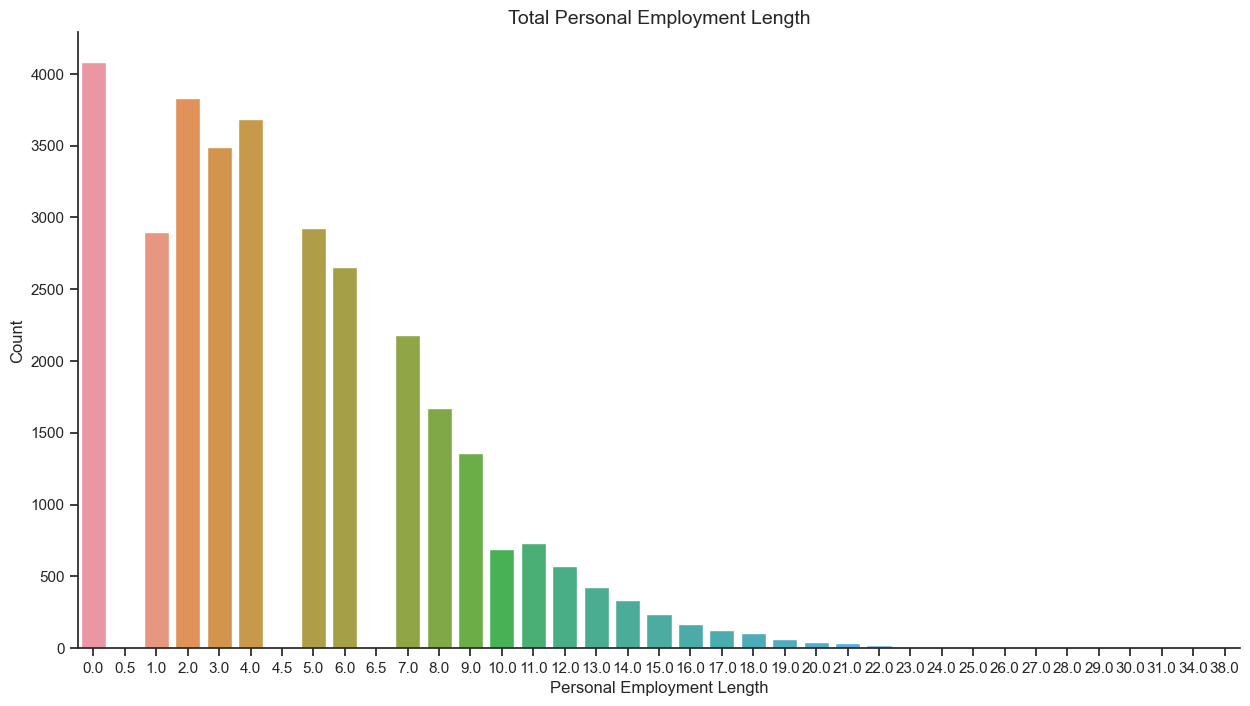

In [119]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data=cr_df, x='person_emp_length')
ax.set_title('Total Personal Employment Length', fontsize=14)
ax.set_xlabel('Personal Employment Length')
ax.set_ylabel('Count')
plt.show()

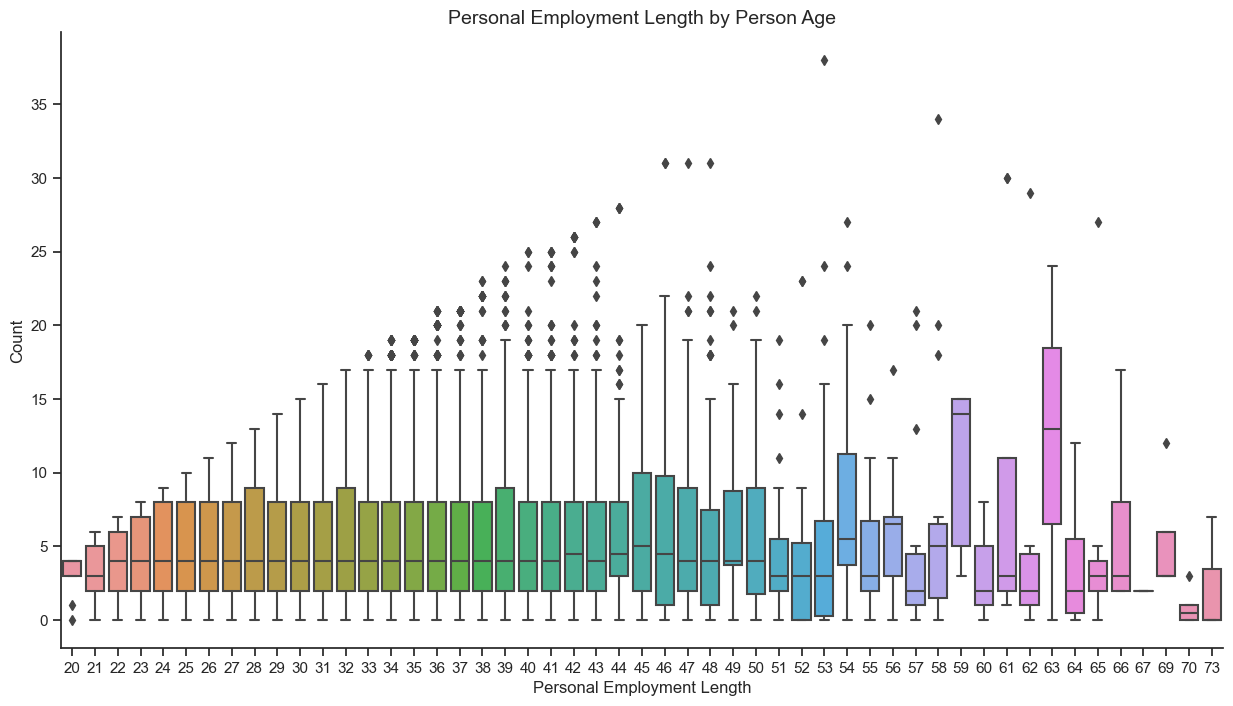

In [118]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=cr_df, x='person_age', y='person_emp_length')
ax.set_title('Personal Employment Length by Person Age', fontsize=14)
ax.set_xlabel('Personal Employment Length')
ax.set_ylabel('Count')
plt.show()

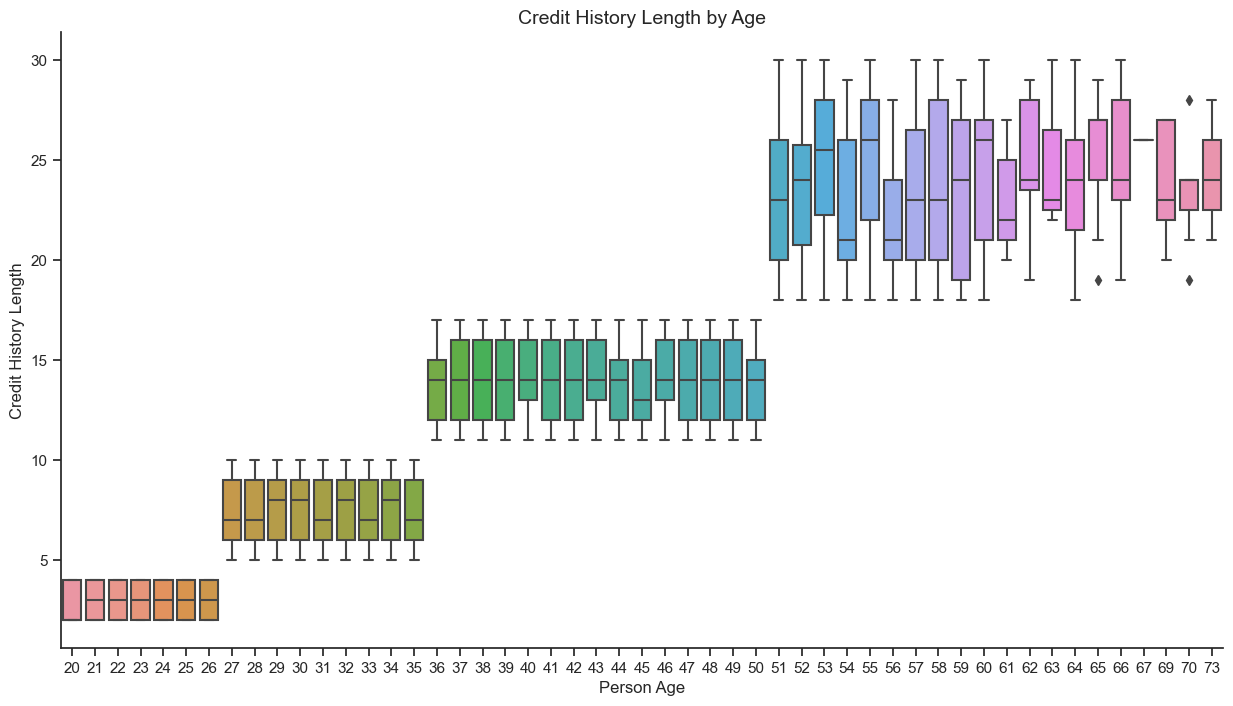

In [117]:
ax = sns.boxplot(data=cr_df, x='person_age', y='cb_person_cred_hist_length')
ax.set_title('Credit History Length by Age', fontsize=14)
ax.set_xlabel('Person Age')
ax.set_ylabel('Credit History Length')

plt.show()

# Model